In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DriveBuzz/temperaturewhole11.csv')
data.head()

Unnamed: 0   Jan  Feb   Mar   Apr   May   June   July   Aug   Sep   Oct   \
0       Dhaka   13.1  16.2  20.8  23.8  24.8   26.2   26.3  26.4  25.9  23.9   
1     Tangail   11.4  14.4  18.9  22.8  24.0   25.6   26.1  26.3  25.7  23.5   
2  Mymensingh   11.9  14.9  18.9  22.3  23.7   25.6   26.1  26.3  25.6  23.3   
3    Faridpur   12.2  15.1  19.7  23.4  24.5   25.8   25.9  26.2  25.9  24.0   
4   Madaripur   12.2  15.1  19.7  23.4  24.5   25.8   25.9  26.2  25.9  24.0   

   Nov   Dec   Period  
0  19.4  14.8    21.8  
1  18.5  13.5    20.9  
2  18.2  13.5    20.9  
3  19.3  14.2    21.3  
4  19.3  14.2    21.3

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DriveBuzz/temperaturewhole11.csv'
data = pd.read_csv(file_path)

column_to_delete = ['Unnamed: 0']
data = data.drop(column_to_delete, axis=1)

# Create the 'Crab price' column by multiplying 'size of increment(g)' by 0.00458
#data['Crab price'] = data['Body Weight After (g)'] * 0.00458

output_file_path = '/content/drive/MyDrive/DriveBuzz/temperaturewhole3.csv'
data.to_csv(output_file_path, index=False)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DriveBuzz/temperaturewhole3.csv')
data.head()

Jan  Feb   Mar   Apr   May   June   July   Aug   Sep   Oct   Nov   Dec   \
0  13.1  16.2  20.8  23.8  24.8   26.2   26.3  26.4  25.9  23.9  19.4  14.8   
1  11.4  14.4  18.9  22.8  24.0   25.6   26.1  26.3  25.7  23.5  18.5  13.5   
2  11.9  14.9  18.9  22.3  23.7   25.6   26.1  26.3  25.6  23.3  18.2  13.5   
3  12.2  15.1  19.7  23.4  24.5   25.8   25.9  26.2  25.9  24.0  19.3  14.2   
4  12.2  15.1  19.7  23.4  24.5   25.8   25.9  26.2  25.9  24.0  19.3  14.2   

   Period  
0    21.8  
1    20.9  
2    20.9  
3    21.3  
4    21.3

In [ ]:
X = data.drop(['Period'], axis=1)
y = data['Period']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)



     Jan  Feb   Mar   Apr   May   June   July   Aug   Sep   Oct   Nov   Dec 
0   13.1  16.2  20.8  23.8  24.8   26.2   26.3  26.4  25.9  23.9  19.4  14.8
1   11.4  14.4  18.9  22.8  24.0   25.6   26.1  26.3  25.7  23.5  18.5  13.5
2   11.9  14.9  18.9  22.3  23.7   25.6   26.1  26.3  25.6  23.3  18.2  13.5
3   12.2  15.1  19.7  23.4  24.5   25.8   25.9  26.2  25.9  24.0  19.3  14.2
4   12.2  15.1  19.7  23.4  24.5   25.8   25.9  26.2  25.9  24.0  19.3  14.2
..   ...   ...   ...   ...   ...    ...    ...   ...   ...   ...   ...   ...
65  25.1  27.9  31.4  32.9  32.8   31.5   30.7  31.1  31.4  31.4  29.4  26.2
66  25.8  28.8  32.0  33.3  33.0   31.7   31.1  31.7  31.9  31.6  29.3  26.5
67  25.3  27.5  30.2  31.4  31.7   30.8   30.1  30.5  31.0  31.3  29.4  26.5
68  26.6  28.9  31.3  32.2  32.4   31.3   30.6  31.2  31.8  32.1  30.3  27.7
69  27.3  30.2  32.3  32.9  32.7   31.5   31.0  31.5  32.0  32.4  31.0  28.5

[70 rows x 12 columns]
0     21.8
1     20.9
2     20.9
3     21.3
4     21

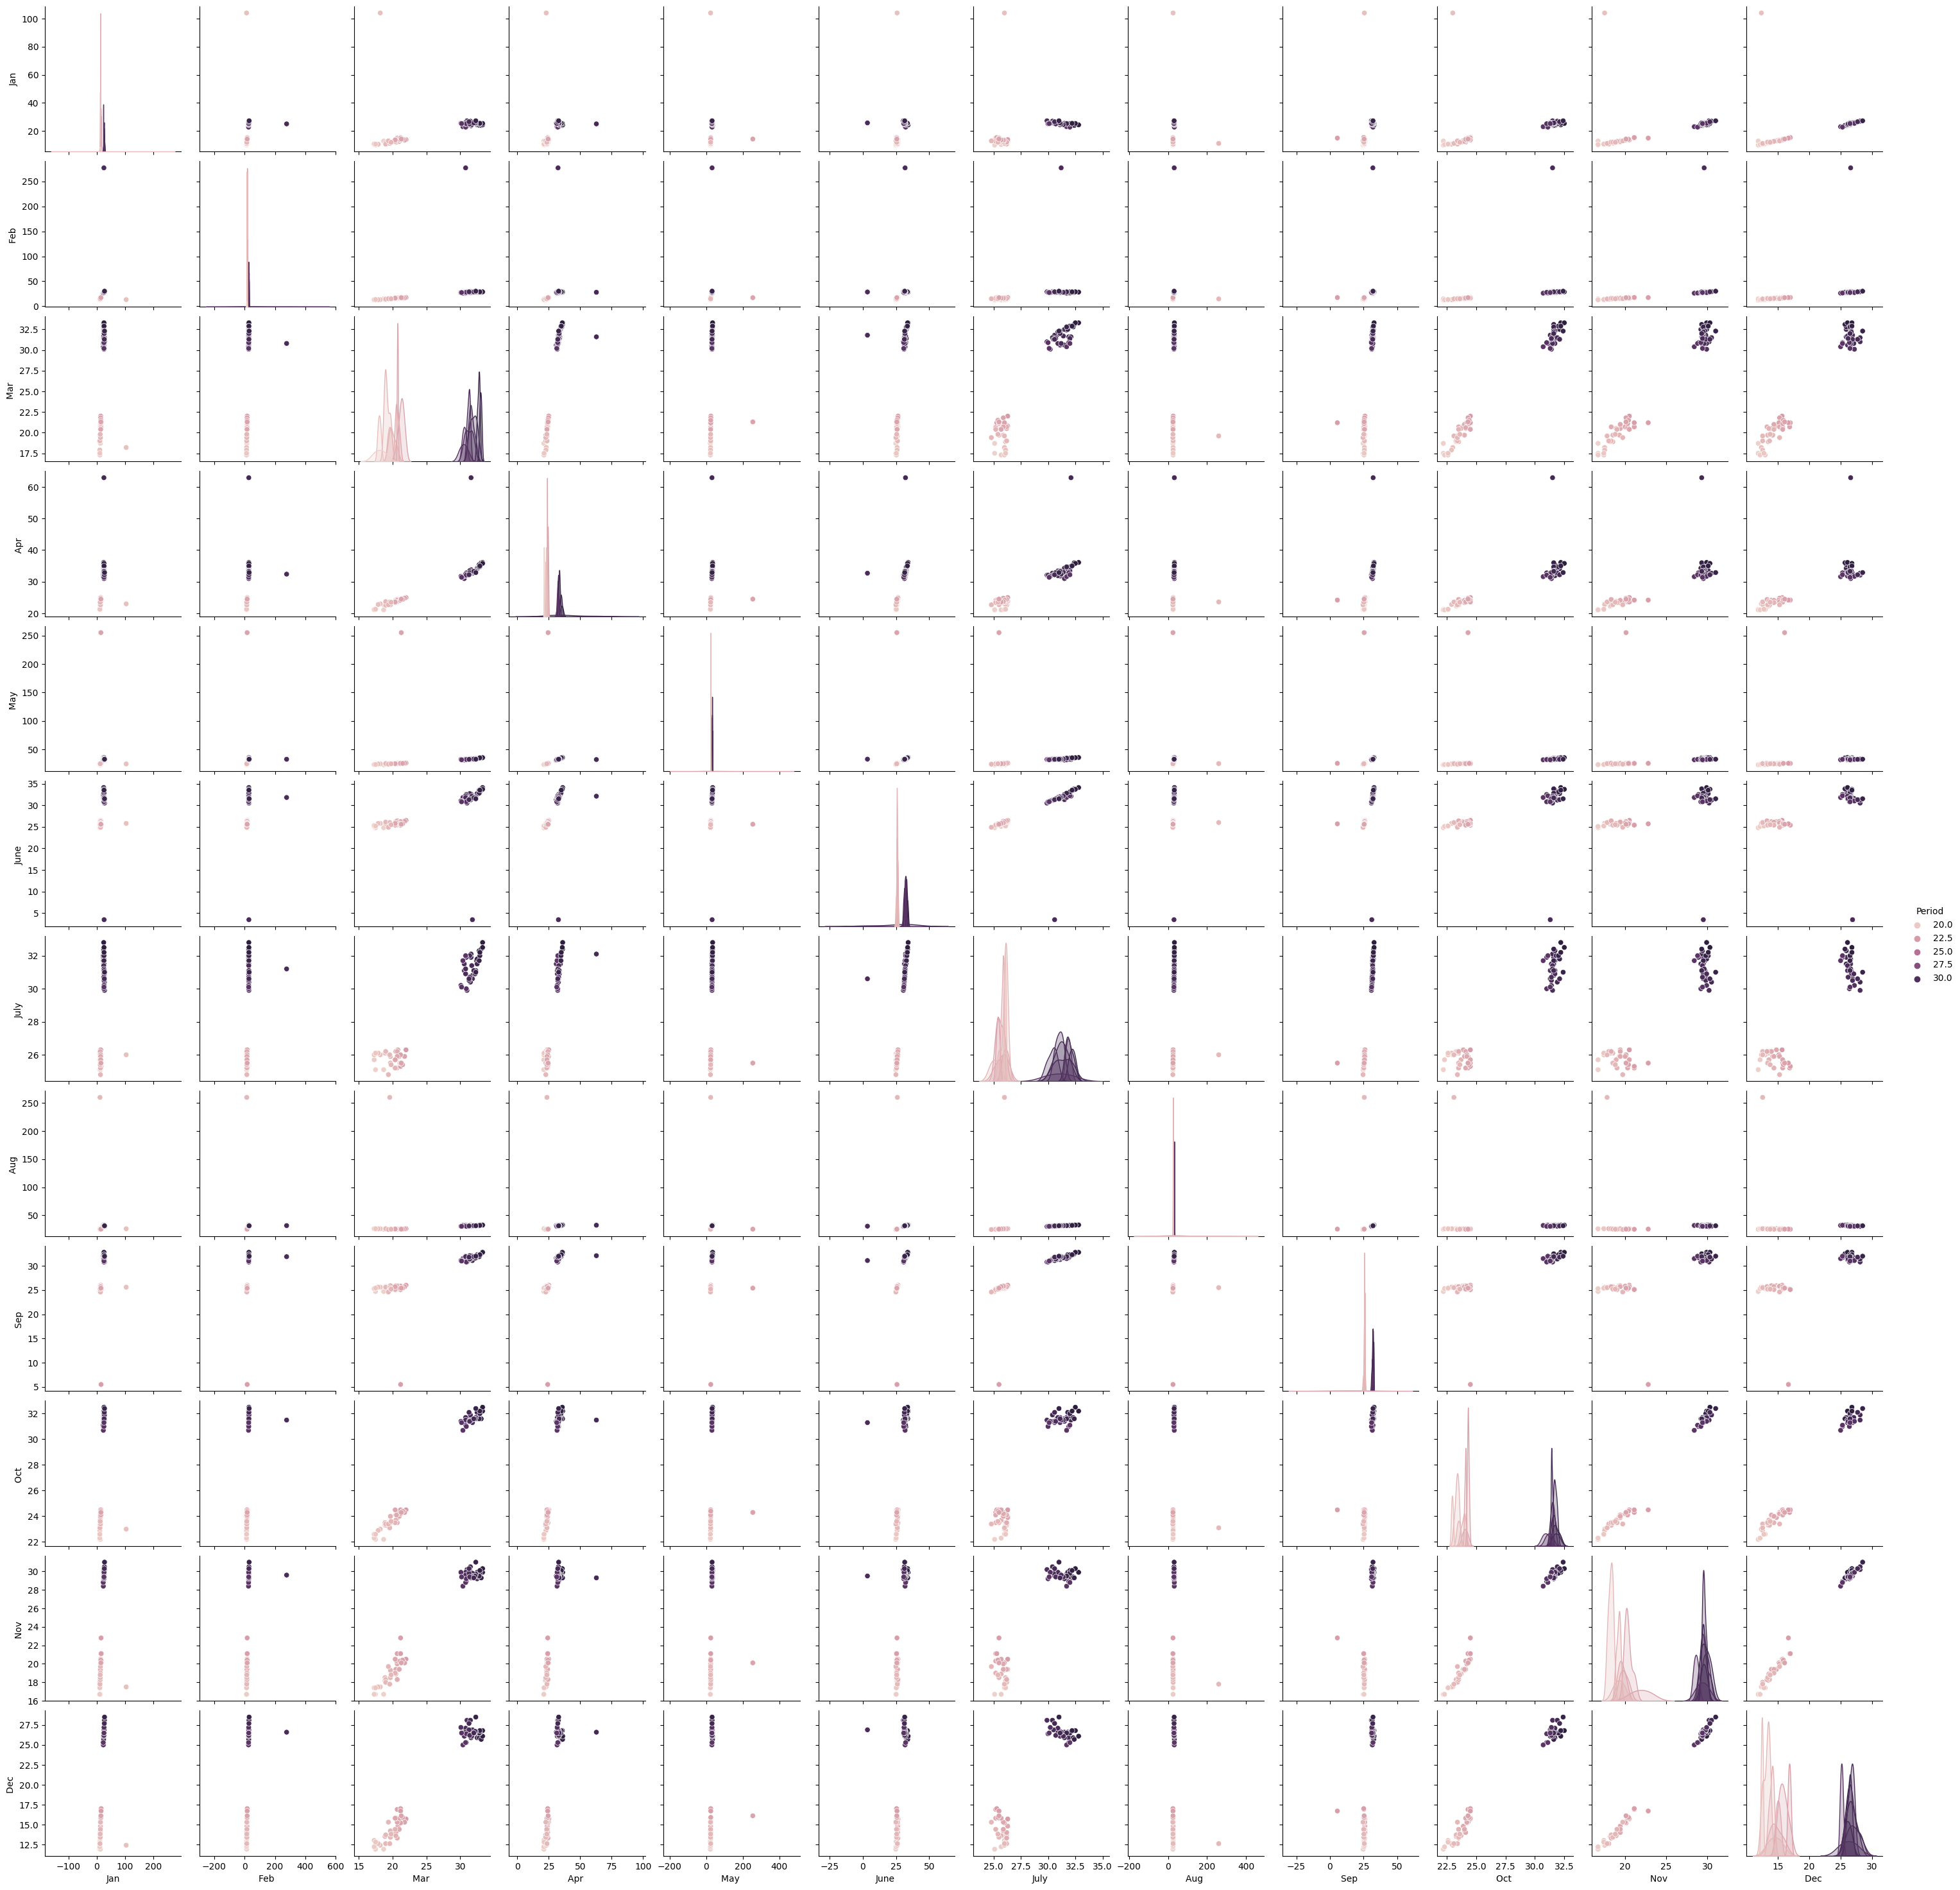

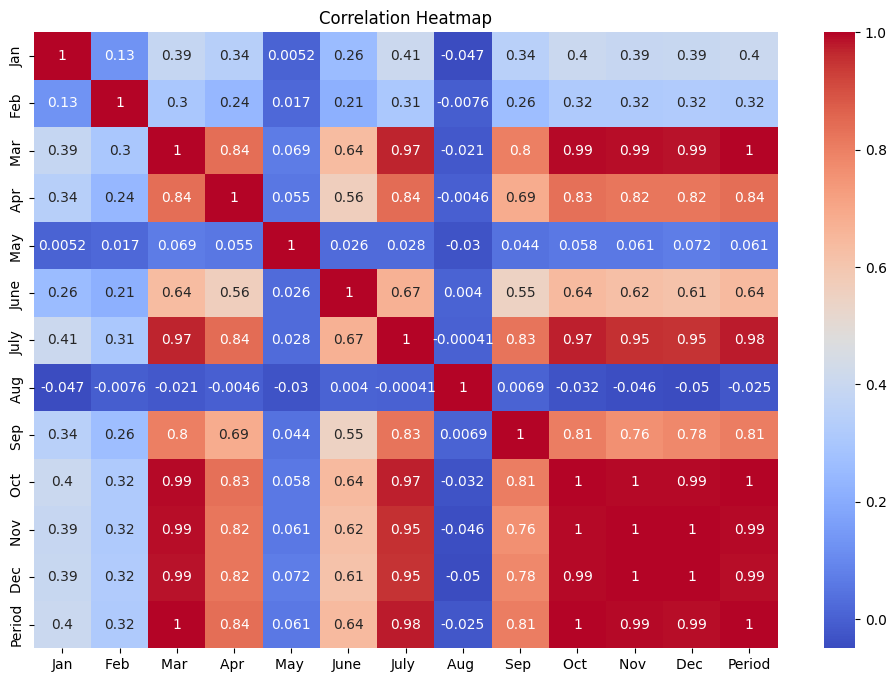

In [ ]:
# Let's explore the dataset by visualizing the distributions and relationships between variables
sns.pairplot(data, hue='Period')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


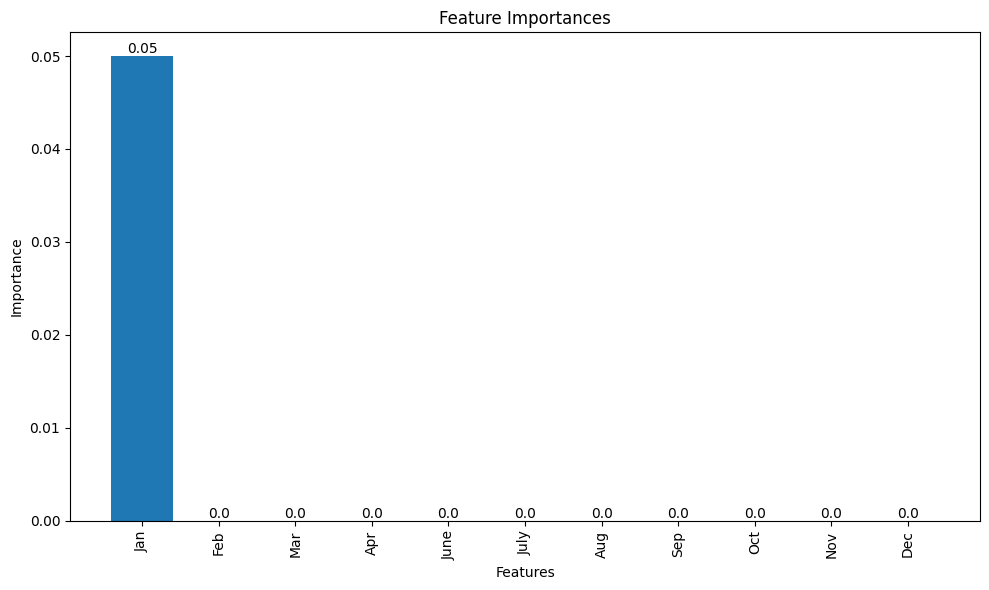

In [ ]:

model = RandomForestRegressor()
model.fit(X_train, y_train)


# Importance for Select the desired features by column
# Select the desired features
selected_features = ['Jan', 'Feb', 'Mar', 'Apr', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Extract feature importances for selected features
importances = model.feature_importances_
feature_names = X.columns

selected_importances = []
for feature in selected_features:
    if feature in feature_names:
        feature_index = np.where(feature_names == feature)[0][0]
        selected_importances.append(importances[feature_index])
    else:
        selected_importances.append(0)  # Assign 0 importance if feature not found

# Create a DataFrame with selected feature names and importance scores
selected_feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': selected_importances})

# Sort the DataFrame by importance scores in descending order
selected_feature_importances = selected_feature_importances.sort_values('Importance', ascending=False)


# Plot the feature importances with values displayed inside the bars
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
bars = plt.bar(selected_feature_importances['Feature'], selected_feature_importances['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()



Cross-Validation RMSE Scores: [0.18735379 0.22166917 0.41818271 0.26362284 0.44621702]
Mean Cross-Validation RMSE: 0.3074091057211312


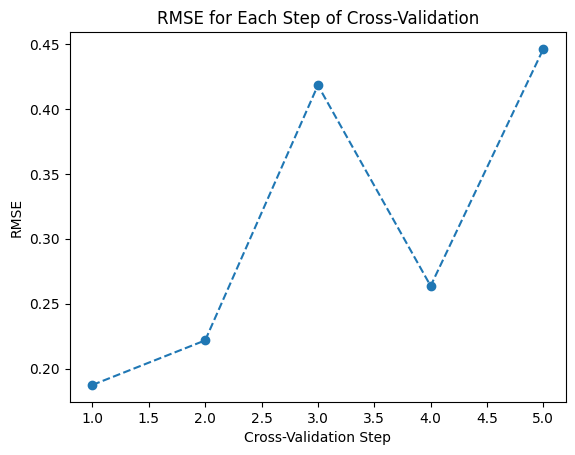

In [ ]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

In [ ]:
# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.10210700000000152
Mean Absolute Error: 0.20314285714285926


In [ ]:
# Predict on the validation set
y_pred_val = rf_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 0.2389135000000062
Validation Mean Absolute Error: 0.3235000000000028


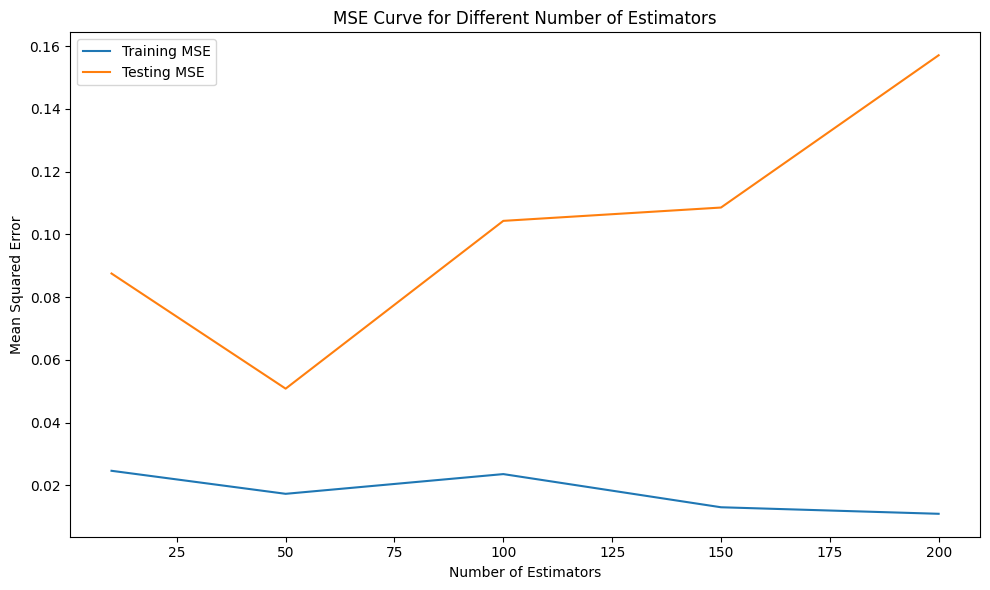

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []

# Split your data into training and testing sets (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in num_estimators:
    # Train the random forest regression model
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


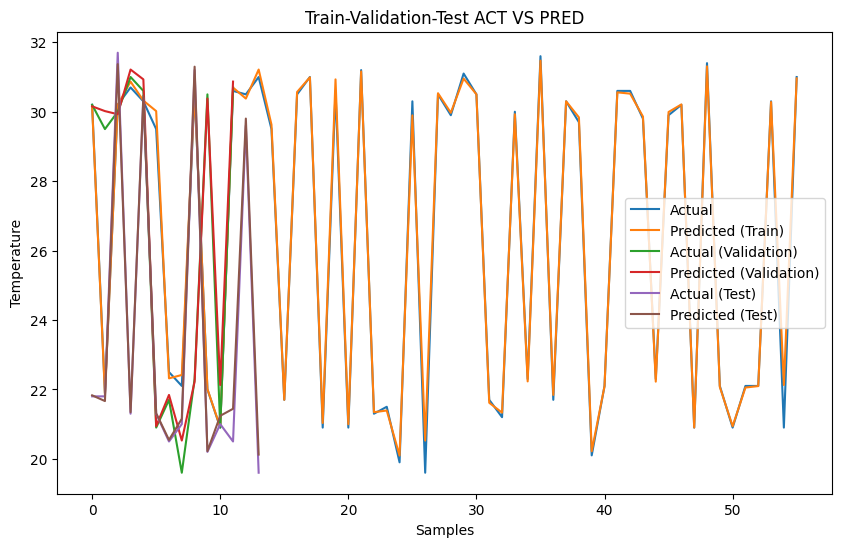

In [ ]:
# Calculate the training set predictions
y_pred_train = rf_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


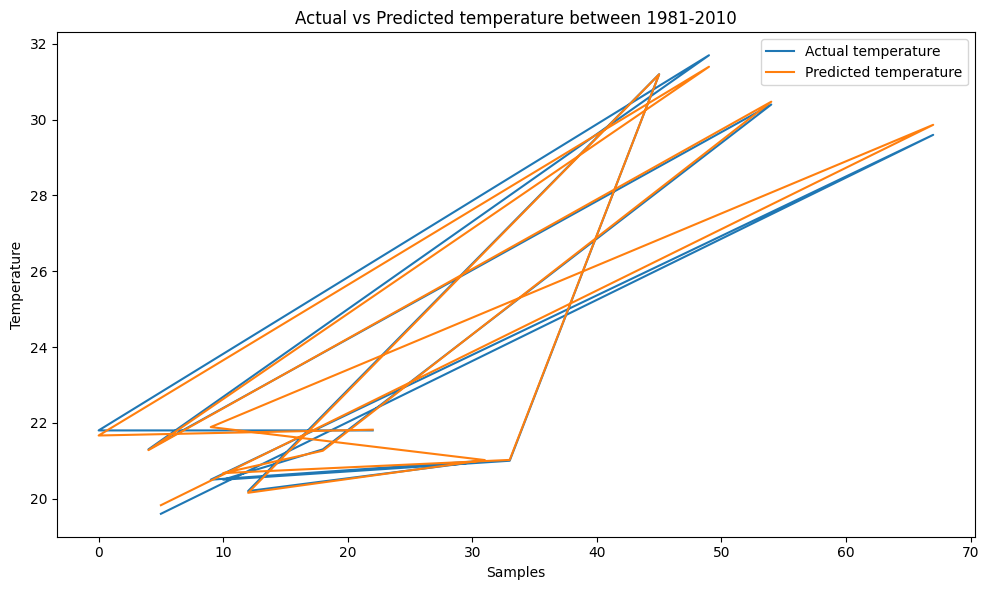

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual temperature': y_test, 'Predicted temperature': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted temperature between 1981-2010")
plt.plot(rent_comparison.index, rent_comparison['Actual temperature'], label='Actual temperature')
plt.plot(rent_comparison.index, rent_comparison['Predicted temperature'], label='Predicted temperature')
plt.xlabel("Samples")
plt.ylabel("Temperature")
plt.legend()
plt.tight_layout()
plt.show()


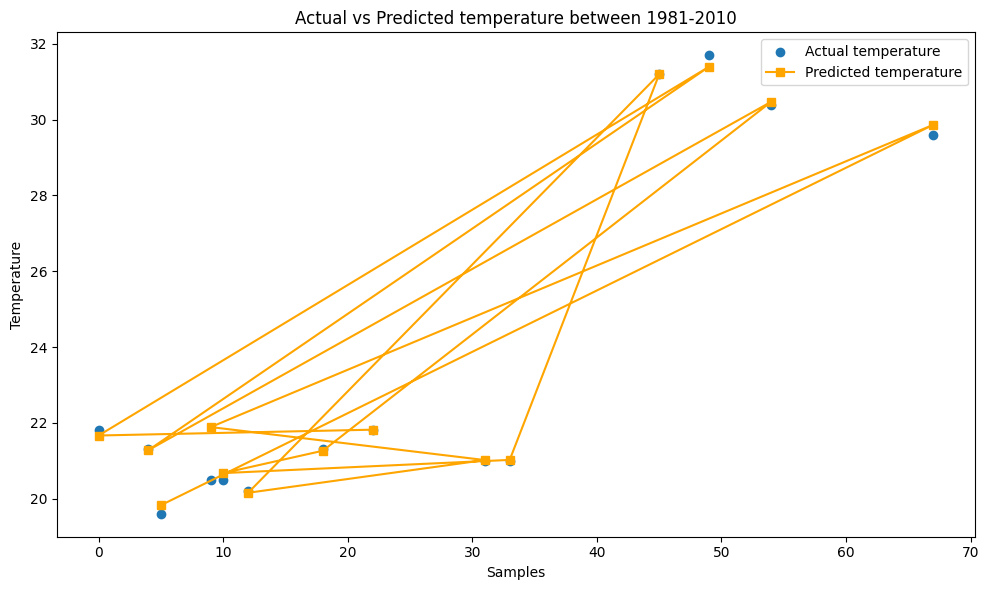

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual temperature': y_test, 'Predicted temperature': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted temperature between 1981-2010")
plt.scatter(rent_comparison.index, rent_comparison['Actual temperature'], label='Actual temperature', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted temperature'], label='Predicted temperature', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Temperature")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)  # Import r2_score from sklearn.metrics
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Random Forest Regressor Model with 100 Estimators:
Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
R-squared (R2): 0.99
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 0.91%


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters to search
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(forest_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best estimator and parameters
best_forest_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict using the best model
best_forest_pred = best_forest_model.predict(X_test)

# Calculate the metrics
best_mae = mean_absolute_error(y_test, best_forest_pred)
best_mse = mean_squared_error(y_test, best_forest_pred)
best_rmse = np.sqrt(best_mse)
best_r2 = r2_score(y_test, best_forest_pred)
best_rmsle = np.sqrt(np.mean(np.log1p(best_forest_pred) - np.log1p(y_test)) ** 2)
best_mape = np.mean(np.abs((y_test - best_forest_pred) / y_test)) * 100

print("Best Random Forest Regressor Model after Hyperparameter Tuning:")
print(f"Best Parameters: {best_params}")
print(f"Mean Absolute Error (MAE): {best_mae:.2f}")
print(f"Mean Squared Error (MSE): {best_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {best_rmse:.2f}")
print(f"R-squared (R2): {best_r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {best_rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {best_mape:.2f}%")


Best Random Forest Regressor Model after Hyperparameter Tuning:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE): 0.37
R-squared (R2): 0.99
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 0.88%


In [ ]:
pip install scikit-optimize


Cross-Validation RMSE Scores (Bayesian Ridge): [11.62240139  2.35546873  3.44245667  0.74676931  6.18957929]
Mean Cross-Validation RMSE (Bayesian Ridge): 4.871335078061748


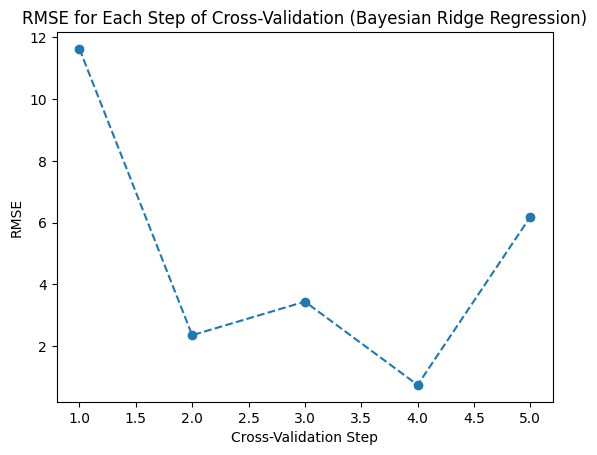

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

# Perform cross-validation for RMSE
cv_scores = cross_val_score(bayesian_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores (Bayesian Ridge):", cv_rmse_scores)
print("Mean Cross-Validation RMSE (Bayesian Ridge):", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation (Bayesian Ridge Regression)')
plt.show()


In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create and fit the Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

# Predict on the test set using Bayesian Ridge Regression
y_pred_test_bayesian = bayesian_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error) for Bayesian Ridge Regression
mse_bayesian = mean_squared_error(y_test, y_pred_test_bayesian)
mae_bayesian = mean_absolute_error(y_test, y_pred_test_bayesian)

# Print the evaluation metrics for Bayesian Ridge Regression
print("Mean Squared Error (Bayesian Ridge Regression):", mse_bayesian)
print("Mean Absolute Error (Bayesian Ridge Regression):", mae_bayesian)


Mean Squared Error (Bayesian Ridge Regression): 0.019553181926802134
Mean Absolute Error (Bayesian Ridge Regression): 0.10581698256929682


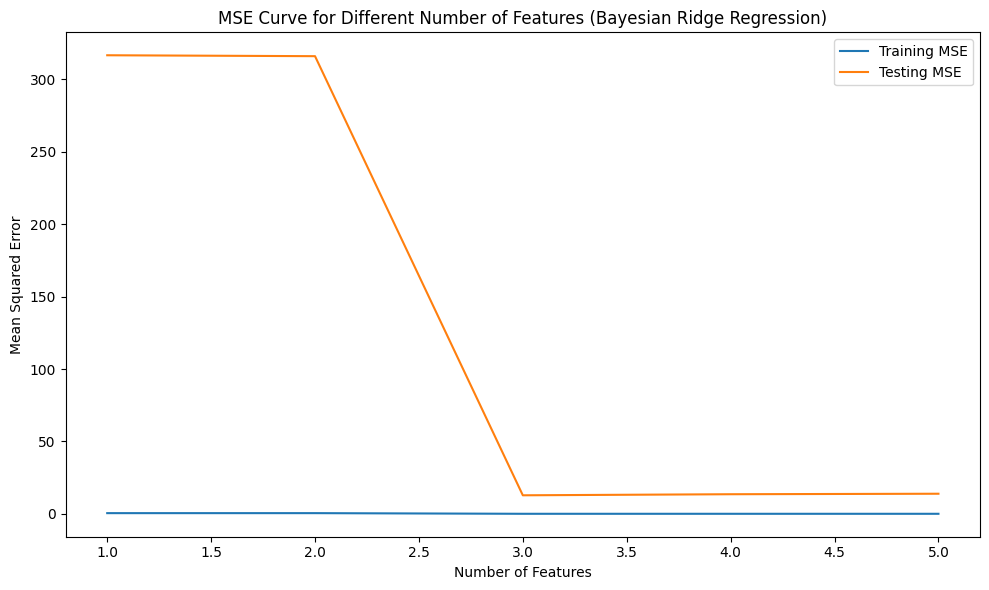

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors = []
test_errors = []

# Split your data into training and testing sets (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the Bayesian Ridge Regression model
    model = BayesianRidge()
    model.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors, label='Training MSE')
plt.plot(num_features, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Features (Bayesian Ridge Regression)')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


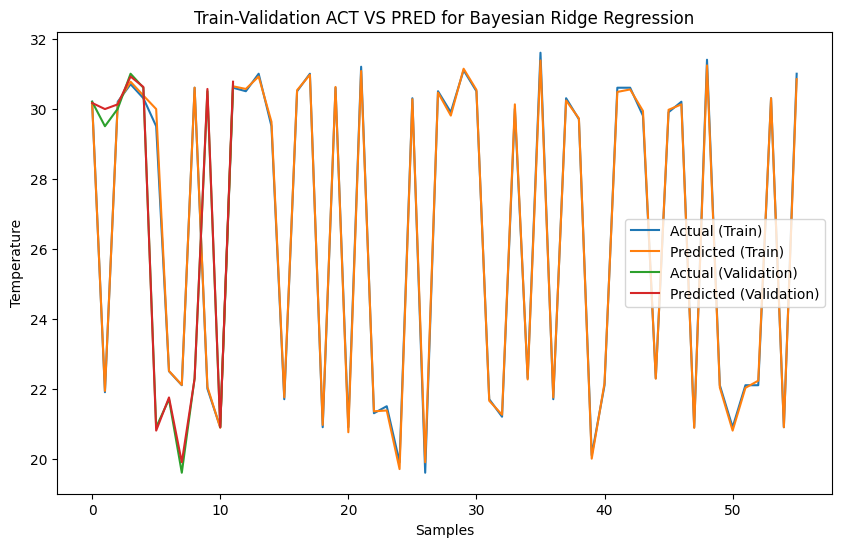

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create and fit the Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

# Calculate the training set predictions for Bayesian Ridge Regression
y_pred_train_bayesian = bayesian_regressor.predict(X_train)

# Calculate the training set mean squared error for Bayesian Ridge Regression
mse_train_bayesian = mean_squared_error(y_train, y_pred_train_bayesian)

# Calculate the validation set predictions for Bayesian Ridge Regression
y_pred_val_bayesian = bayesian_regressor.predict(X_val)

# Plot the train-validation loss curves for Bayesian Ridge Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_bayesian)), y_pred_train_bayesian, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_bayesian)), y_pred_val_bayesian, label='Predicted (Validation)')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.title('Train-Validation ACT VS PRED for Bayesian Ridge Regression')
plt.legend()
plt.show()


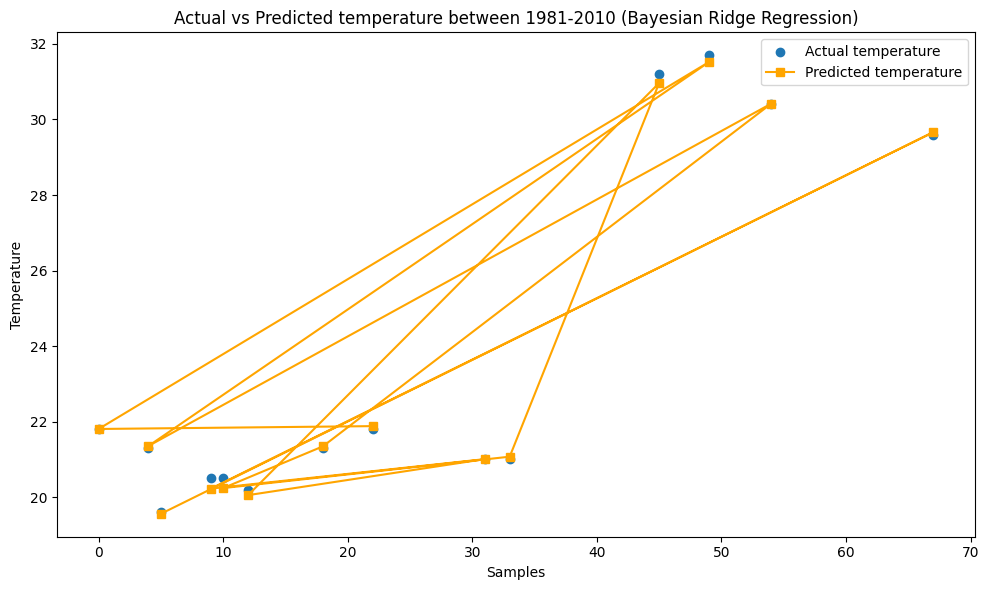

In [ ]:
# Make predictions on the test set using Bayesian Ridge Regression
y_pred_bayesian = bayesian_regressor.predict(X_test)

# Create a DataFrame with actual and predicted values for Bayesian Ridge Regression
rent_comparison_bayesian = pd.DataFrame({'Actual temperature': y_test, 'Predicted temperature': y_pred_bayesian})

# Plot the actual versus predicted values for Bayesian Ridge Regression
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted temperature between 1981-2010 (Bayesian Ridge Regression)")
plt.scatter(rent_comparison_bayesian.index, rent_comparison_bayesian['Actual temperature'], label='Actual temperature', marker='o')
plt.plot(rent_comparison_bayesian.index, rent_comparison_bayesian['Predicted temperature'], label='Predicted temperature', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Temperature")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate a Bayesian Ridge Regression model with default hyperparameter settings
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_pred = bayesian_model.predict(X_test)

mae = mean_absolute_error(y_test, bayesian_pred)
mse = mean_squared_error(y_test, bayesian_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, bayesian_pred)
rmsle = np.sqrt(np.mean(np.log1p(bayesian_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - bayesian_pred) / y_test)) * 100

print(f"\nBayesian Ridge Regression Model with Default Hyperparameter Settings:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Bayesian Ridge Regression Model with Default Hyperparameter Settings:
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 0.45%


Cross-Validation RMSE Scores (KNN Regression): [2.64616074 0.24360923 0.47981057 0.28406145 2.82138586]
Mean Cross-Validation RMSE (KNN Regression): 1.2950055699191139


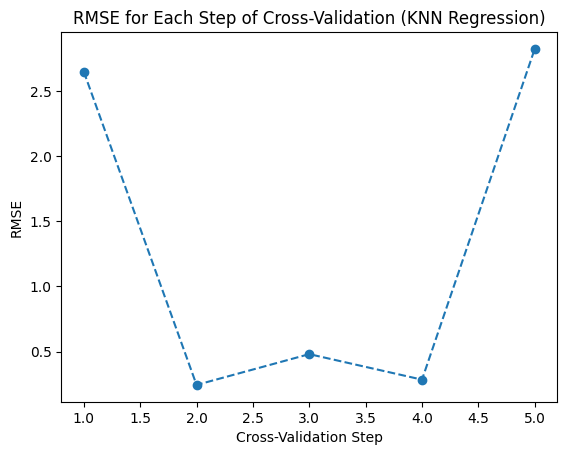

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create and fit the KNN Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_regressor.fit(X_train, y_train)

# Perform cross-validation for RMSE (KNN Regression)
cv_scores = cross_val_score(knn_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores (KNN Regression):", cv_rmse_scores)
print("Mean Cross-Validation RMSE (KNN Regression):", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation (KNN Regression)')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create and fit the KNN Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_regressor.fit(X_train, y_train)

# Predict on the test set using KNN Regression
y_pred_test = knn_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error (KNN Regression):", mse)
print("Mean Absolute Error (KNN Regression):", mae)


Mean Squared Error (KNN Regression): 6.9418000000000015
Mean Absolute Error (KNN Regression): 0.8985714285714285


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create and fit the KNN Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_regressor.fit(X_train, y_train)

# Predict on the validation set using KNN Regression
y_pred_val = knn_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error (KNN Regression):", mse_val)
print("Validation Mean Absolute Error (KNN Regression):", mae_val)


Validation Mean Squared Error (KNN Regression): 4.627400000000003
Validation Mean Absolute Error (KNN Regression): 0.8133333333333322


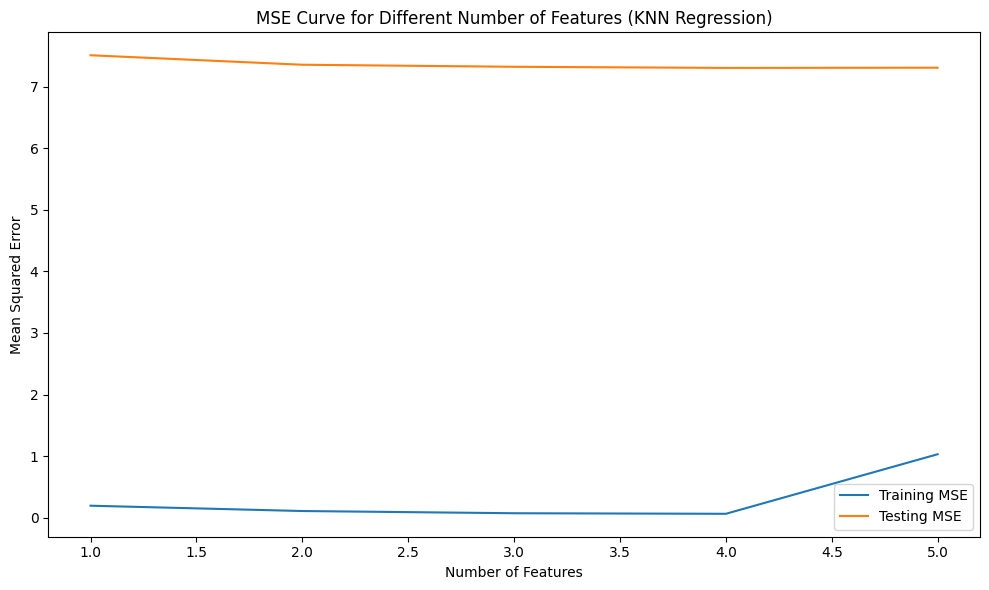

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors = []
test_errors = []

# Split your data into training and testing sets (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the KNN regression model
    model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
    model.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors, label='Training MSE')
plt.plot(num_features, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Features (KNN Regression)')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


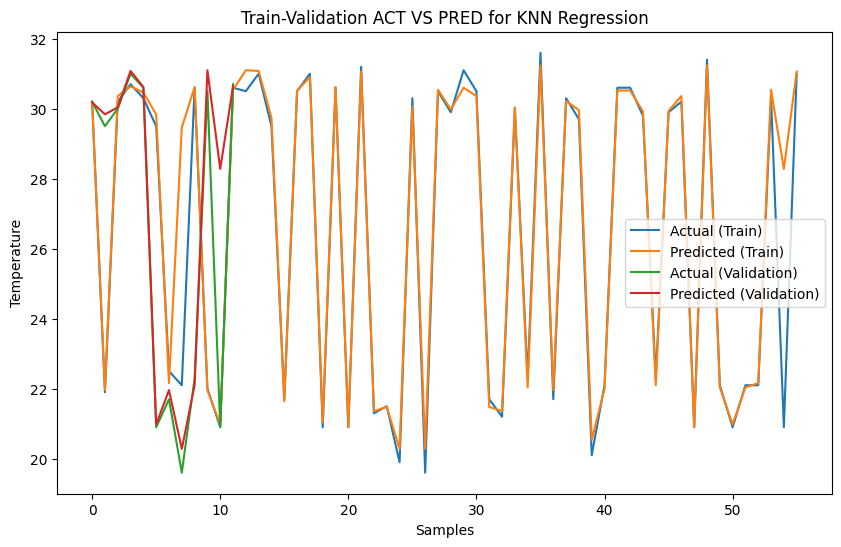

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Create and fit the KNN Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_regressor.fit(X_train, y_train)

# Calculate the training set predictions for KNN Regression
y_pred_train_knn = knn_regressor.predict(X_train)

# Calculate the validation set predictions for KNN Regression
y_pred_val_knn = knn_regressor.predict(X_val)

# Plot the train-validation loss curves for KNN Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_knn)), y_pred_train_knn, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_knn)), y_pred_val_knn, label='Predicted (Validation)')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.title('Train-Validation ACT VS PRED for KNN Regression')
plt.legend()
plt.show()


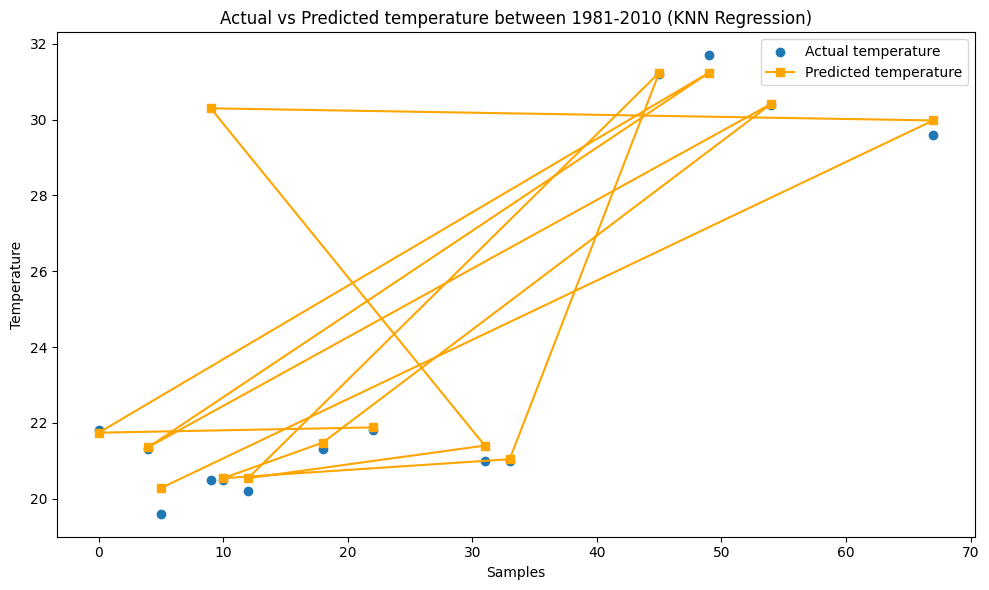

In [ ]:
# Make predictions on the test set using KNN Regression
y_pred_knn = knn_regressor.predict(X_test)

# Create a DataFrame with actual and predicted values for KNN Regression
knn_comparison = pd.DataFrame({'Actual temperature': y_test, 'Predicted temperature': y_pred_knn})

# Plot the actual versus predicted values for KNN Regression
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted temperature between 1981-2010 (KNN Regression)")
plt.scatter(knn_comparison.index, knn_comparison['Actual temperature'], label='Actual temperature', marker='o')
plt.plot(knn_comparison.index, knn_comparison['Predicted temperature'], label='Predicted temperature', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Temperature")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create and evaluate a KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean(np.log1p(knn_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

print(f"\nKNN Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regression Model:
Mean Absolute Error (MAE): 0.90
Mean Squared Error (MSE): 6.94
Root Mean Squared Error (RMSE): 2.63
R-squared (R2): 0.66
Root Mean Squared Logarithmic Error (RMSLE): 0.03
Mean Absolute Percentage Error (MAPE): 4.28%


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Set hyperparameter values
n_neighbors = 7  # Number of neighbors to consider (you can adjust this)
weights = 'distance'  # Weight points by the inverse of their distance
algorithm = 'auto'  # Algorithm to compute the nearest neighbors
leaf_size = 30  # Leaf size for the BallTree or KDTree
p = 2  # Power parameter for the Minkowski metric (2 for Euclidean distance)

# Create and evaluate a KNN Regression model
knn_model = KNeighborsRegressor(
    n_neighbors=n_neighbors,
    weights=weights,
    algorithm=algorithm,
    leaf_size=leaf_size,
    p=p
)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean(np.log1p(knn_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

print(f"\nKNN Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regression Model:
Mean Absolute Error (MAE): 0.88
Mean Squared Error (MSE): 7.03
Root Mean Squared Error (RMSE): 2.65
R-squared (R2): 0.65
Root Mean Squared Logarithmic Error (RMSLE): 0.03
Mean Absolute Percentage Error (MAPE): 4.18%


**Linear regression**

Cross-Validation RMSE Scores: [11.32992631  2.4726914   3.75627286  0.56252955 17.62635359]
Mean Cross-Validation RMSE: 7.14955474169908


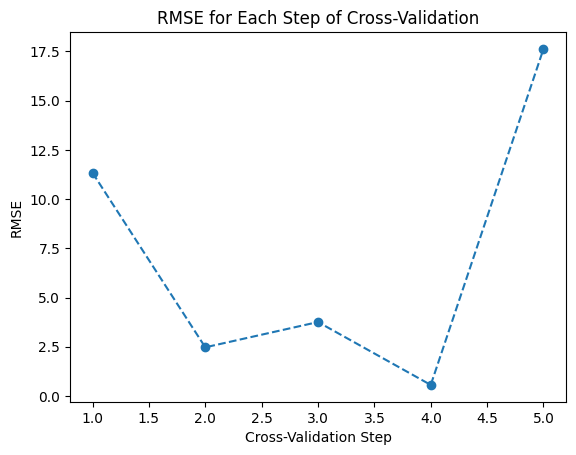

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Create a LinearRegression model
linear_regressor = LinearRegression()

# Fit the model to the training data
linear_regressor.fit(X_train, y_train)

# Perform cross-validation with Mean Squared Error (MSE) as the scoring metric
cv_scores = cross_val_score(linear_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the Root Mean Squared Error (RMSE) scores
cv_rmse_scores = (-cv_scores) ** 0.5

# Print the RMSE scores
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set using the Linear Regression model
y_pred_test = linear_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 1.6975014083133773
Mean Absolute Error: 0.4354807489882554


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the validation set using the Linear Regression model
y_pred_val = linear_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 0.026997925632297474
Validation Mean Absolute Error: 0.10167130737732943


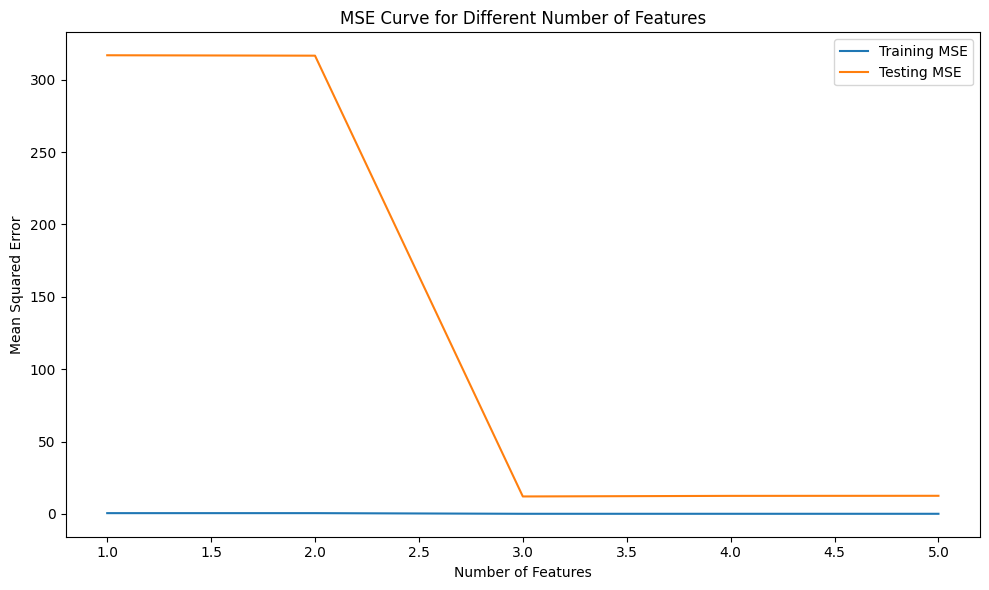

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors = []
test_errors = []

# Split your data into training and testing sets (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors, label='Training MSE')
plt.plot(num_features, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


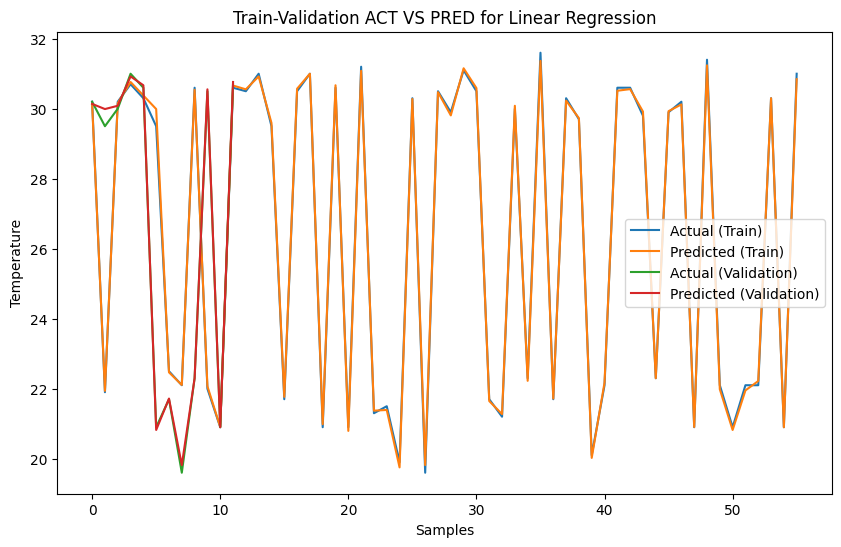

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create and fit the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Calculate the training set predictions for Linear Regression
y_pred_train_linear = linear_regressor.predict(X_train)

# Calculate the validation set predictions for Linear Regression
y_pred_val_linear = linear_regressor.predict(X_val)

# Plot the train-validation loss curves for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_linear)), y_pred_train_linear, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_linear)), y_pred_val_linear, label='Predicted (Validation)')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.title('Train-Validation ACT VS PRED for Linear Regression')
plt.legend()
plt.show()


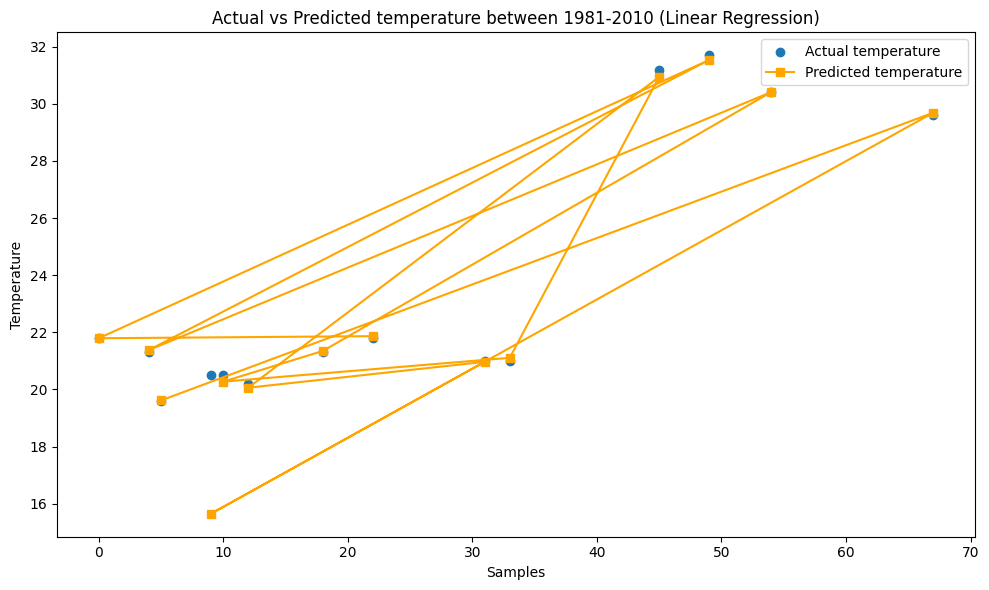

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Make predictions on the test set using Linear Regression
y_pred_linear = linear_regressor.predict(X_test)  # Assuming you've already trained the linear_regressor

# Create a DataFrame with actual and predicted values for Linear Regression
linear_comparison = pd.DataFrame({'Actual temperature': y_test, 'Predicted temperature': y_pred_linear})

# Plot the actual versus predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted temperature between 1981-2010 (Linear Regression)")
plt.scatter(linear_comparison.index, linear_comparison['Actual temperature'], label='Actual temperature', marker='o')
plt.plot(linear_comparison.index, linear_comparison['Predicted temperature'], label='Predicted temperature', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Temperature")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_pred)
rmsle = np.sqrt(np.mean(np.log1p(lr_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lr_pred) / y_test)) * 100

print(f"\nLinear Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Linear Regression Model:
Mean Absolute Error (MAE): 0.44
Mean Squared Error (MSE): 1.70
Root Mean Squared Error (RMSE): 1.30
R-squared (R2): 0.92
Root Mean Squared Logarithmic Error (RMSLE): 0.02
Mean Absolute Percentage Error (MAPE): 2.06%


Cross-Validation RMSE Scores: [ 0.26484985  0.27569154  0.47670777  0.4099059  10.07386086]
Mean Cross-Validation RMSE: 2.300203186928284


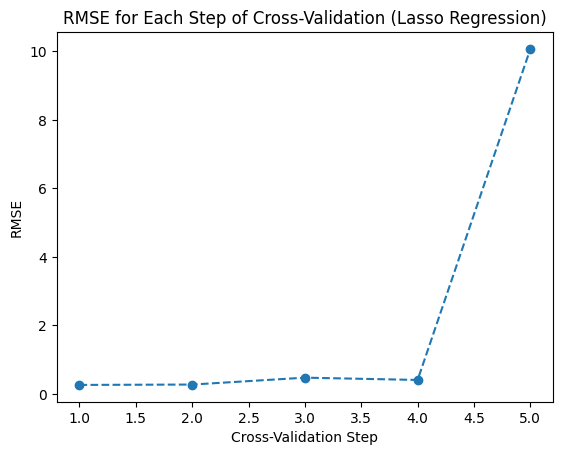

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the Lasso Regression model
lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)

# Perform cross-validation for RMSE
cv_scores = cross_val_score(lasso_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation (Lasso Regression)')
plt.show()


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create and fit the Lasso Regression model
lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)

# Predict on the test set using Lasso Regression
y_pred_test = lasso_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error (Lasso Regression):", mse)
print("Mean Absolute Error (Lasso Regression):", mae)


Mean Squared Error (Lasso Regression): 0.10232887980531331
Mean Absolute Error (Lasso Regression): 0.2739585638833084


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create and fit the Lasso Regression model
lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)

# Predict on the validation set using Lasso Regression
y_pred_val = lasso_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error (Lasso Regression):", mse_val)
print("Validation Mean Absolute Error (Lasso Regression):", mae_val)


Validation Mean Squared Error (Lasso Regression): 0.08945094911104721
Validation Mean Absolute Error (Lasso Regression): 0.22096464236061752


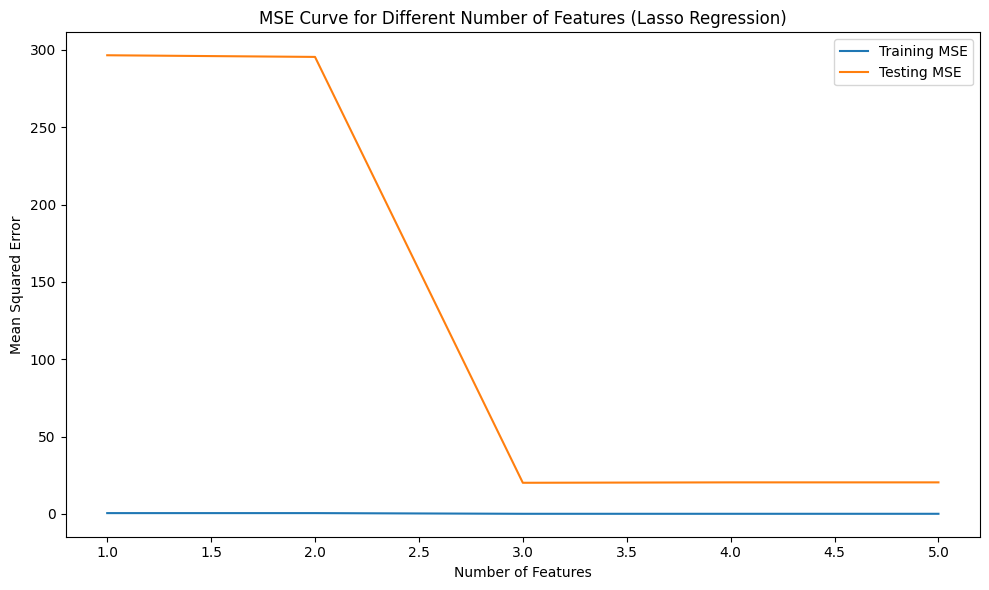

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors = []
test_errors = []

# Split your data into training and testing sets (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the Lasso regression model
    model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
    model.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors, label='Training MSE')
plt.plot(num_features, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Features (Lasso Regression)')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


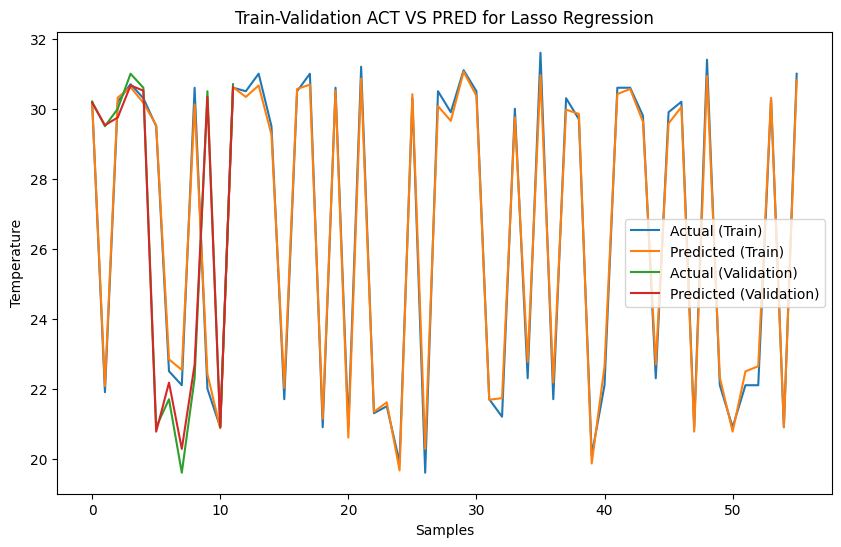

In [ ]:
# Calculate the training set predictions for Lasso Regression
y_pred_train_lasso = lasso_regressor.predict(X_train)

# Calculate the training set mean squared error for Lasso Regression
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)

# Calculate the validation set predictions for Lasso Regression
y_pred_val_lasso = lasso_regressor.predict(X_val)

# Plot the train-validation loss curves for Lasso Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_lasso)), y_pred_train_lasso, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_lasso)), y_pred_val_lasso, label='Predicted (Validation)')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.title('Train-Validation ACT VS PRED for Lasso Regression')
plt.legend()
plt.show()


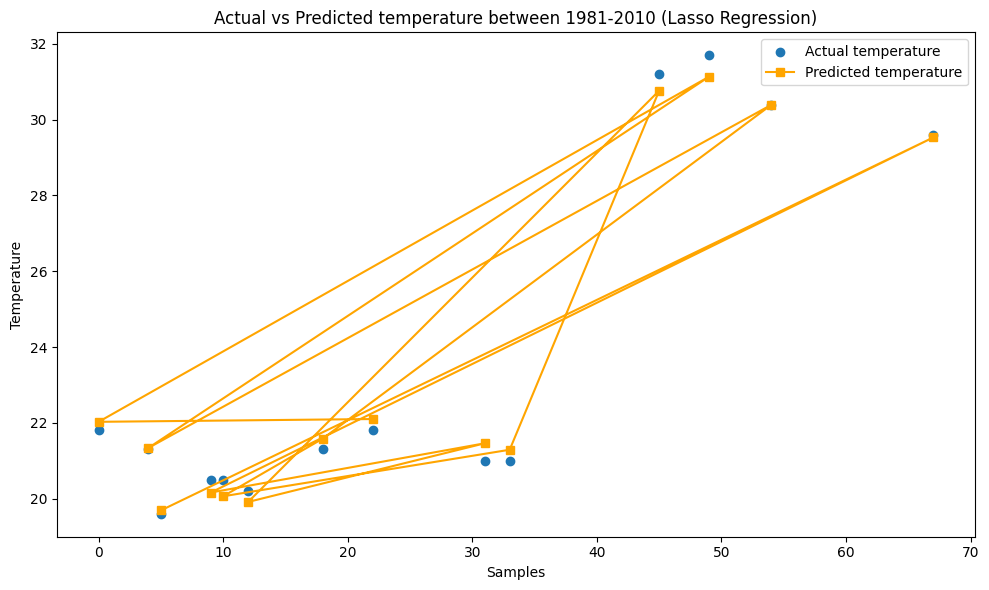

In [ ]:
# Make predictions on the test set using Lasso Regression
y_pred_lasso = lasso_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values for Lasso Regression
rent_comparison_lasso = pd.DataFrame({'Actual temperature': y_test, 'Predicted temperature': y_pred_lasso})

# Plot the actual versus predicted values for Lasso Regression
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted temperature between 1981-2010 (Lasso Regression)")
plt.scatter(rent_comparison_lasso.index, rent_comparison_lasso['Actual temperature'], label='Actual temperature', marker='o')
plt.plot(rent_comparison_lasso.index, rent_comparison_lasso['Predicted temperature'], label='Predicted temperature', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Temperature")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate a Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)
rmsle = np.sqrt(np.mean(np.log1p(lasso_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lasso_pred) / y_test)) * 100

print(f"\nLasso Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Lasso Regression Model:
Mean Absolute Error (MAE): 0.27
Mean Squared Error (MSE): 0.10
Root Mean Squared Error (RMSE): 0.32
R-squared (R2): 0.99
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 1.19%


Cross-Validation RMSE Scores (Ridge Regression): [11.9027119   2.17318612  2.50101078  0.75514613  6.89555916]
Mean Cross-Validation RMSE (Ridge Regression): 4.845522818683884


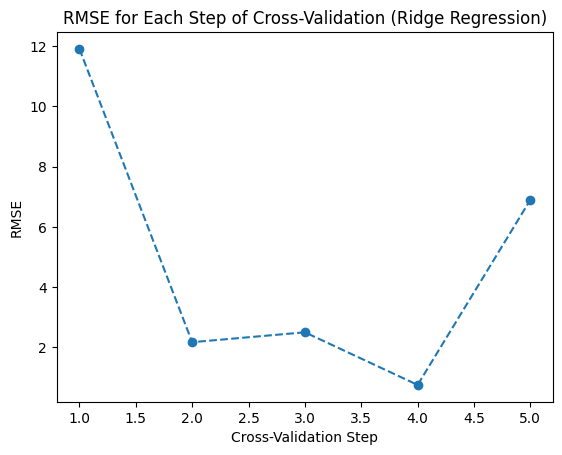

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the Ridge Regression model
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)

# Perform cross-validation for RMSE
cv_scores = cross_val_score(ridge_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores (Ridge Regression):", cv_rmse_scores)
print("Mean Cross-Validation RMSE (Ridge Regression):", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation (Ridge Regression)')
plt.show()


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create and fit the Ridge Regression model
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)

# Predict on the test set using Ridge Regression
y_pred_test = ridge_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error (Ridge Regression):", mse)
print("Mean Absolute Error (Ridge Regression):", mae)


Mean Squared Error (Ridge Regression): 0.022241142868093717
Mean Absolute Error (Ridge Regression): 0.11093460580775931


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create and fit the Ridge Regression model
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)

# Predict on the validation set using Ridge Regression
y_pred_val = ridge_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error (Ridge Regression):", mse_val)
print("Validation Mean Absolute Error (Ridge Regression):", mae_val)


Validation Mean Squared Error (Ridge Regression): 0.03192836540656466
Validation Mean Absolute Error (Ridge Regression): 0.11410438626775961


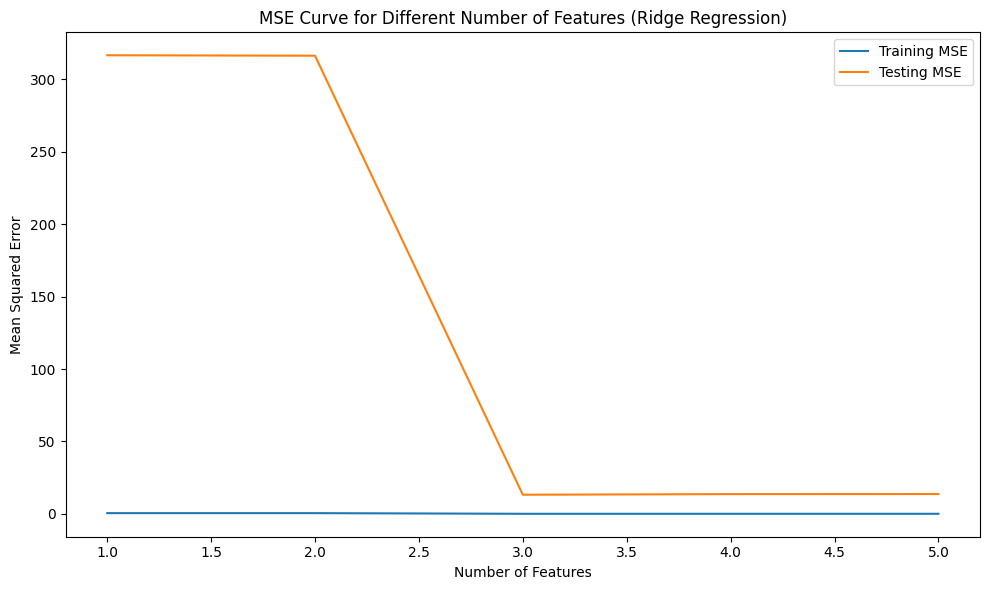

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors = []
test_errors = []

# Split your data into training and testing sets (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the Ridge regression model
    alpha = 1.0  # You can adjust the alpha (regularization strength) as needed
    model = Ridge(alpha=alpha)
    model.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors, label='Training MSE')
plt.plot(num_features, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Features (Ridge Regression)')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


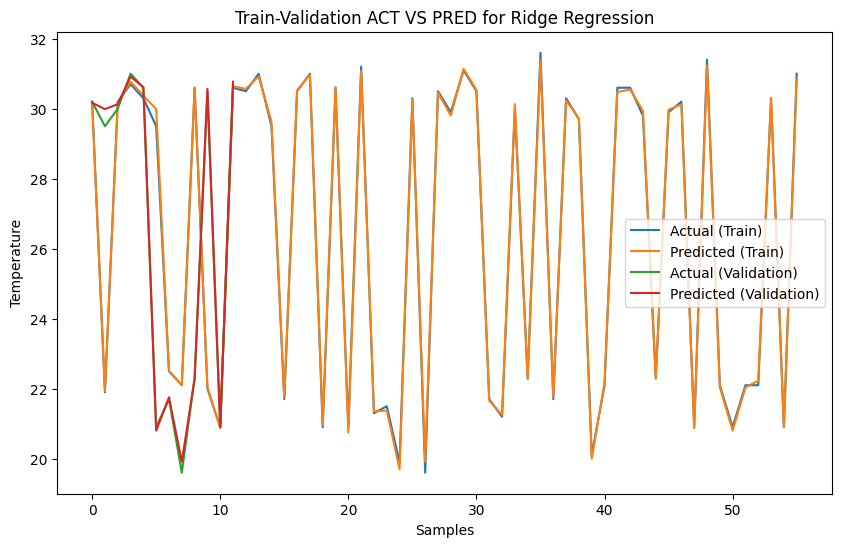

In [ ]:
# Calculate the training set predictions for Ridge Regression
y_pred_train_ridge = ridge_regressor.predict(X_train)

# Calculate the validation set predictions for Ridge Regression
y_pred_val_ridge = ridge_regressor.predict(X_val)

# Plot the train-validation loss curves for Ridge Regression
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_ridge)), y_pred_train_ridge, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_ridge)), y_pred_val_ridge, label='Predicted (Validation)')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.title('Train-Validation ACT VS PRED for Ridge Regression')
plt.legend()
plt.show()


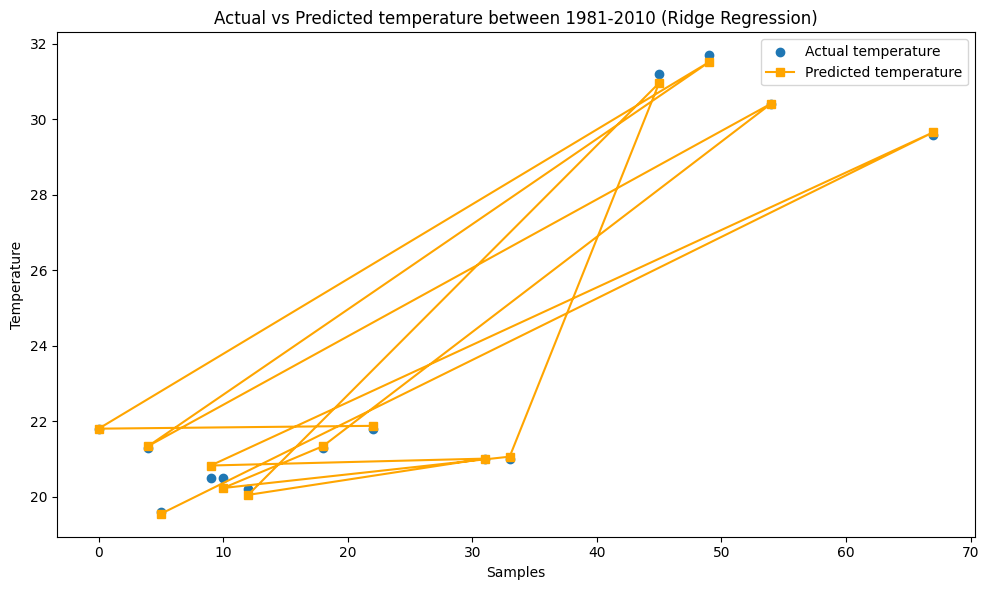

In [ ]:
# Make predictions on the test set using Ridge Regression
y_pred_ridge = ridge_regressor.predict(X_test)

# Create a DataFrame with actual and predicted values for Ridge Regression
ridge_comparison = pd.DataFrame({'Actual temperature': y_test, 'Predicted temperature': y_pred_ridge})

# Plot the actual versus predicted values for Ridge Regression
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted temperature between 1981-2010 (Ridge Regression)")
plt.scatter(ridge_comparison.index, ridge_comparison['Actual temperature'], label='Actual temperature', marker='o')
plt.plot(ridge_comparison.index, ridge_comparison['Predicted temperature'], label='Predicted temperature', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Temperature")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import Ridge

# Create and evaluate a Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

mae = mean_absolute_error(y_test, ridge_pred)
mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ridge_pred)
rmsle = np.sqrt(np.mean(np.log1p(ridge_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - ridge_pred) / y_test)) * 100

print(f"\nRidge Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Ridge Regression Model:
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 0.48%


Cross-Validation RMSE Scores (SVR): [10.23042878  2.01975753  4.06803719  0.35560774  5.70004107]
Mean Cross-Validation RMSE (SVR): 4.474774461276697


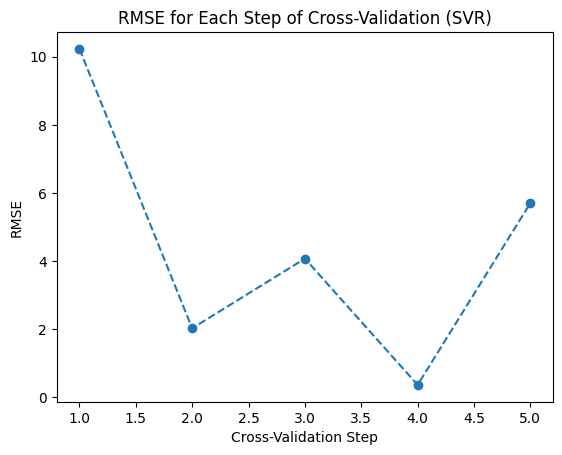

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the Support Vector Regression (SVR) model
svr_regressor = SVR(kernel='linear')  # You can choose a different kernel if needed
svr_regressor.fit(X_train, y_train)

# Perform cross-validation for RMSE
cv_scores = cross_val_score(svr_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores (SVR):", cv_rmse_scores)
print("Mean Cross-Validation RMSE (SVR):", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation (SVR)')
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create and fit the Support Vector Regression (SVR) model
svr_regressor = SVR(kernel='linear')  # You can choose a different kernel if needed
svr_regressor.fit(X_train, y_train)

# Predict on the test set using SVR
y_pred_test_svr = svr_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse_svr = mean_squared_error(y_test, y_pred_test_svr)
mae_svr = mean_absolute_error(y_test, y_pred_test_svr)

# Print the evaluation metrics for SVR
print("Mean Squared Error (SVR):", mse_svr)
print("Mean Absolute Error (SVR):", mae_svr)


Mean Squared Error (SVR): 5.013631183064342
Mean Absolute Error (SVR): 0.6836243288219052


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create and fit the Support Vector Regression (SVR) model
svr_regressor = SVR(kernel='linear')  # You can choose a different kernel if needed
svr_regressor.fit(X_train, y_train)

# Predict on the validation set using SVR
y_pred_val_svr = svr_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val_svr = mean_squared_error(y_val, y_pred_val_svr)
mae_val_svr = mean_absolute_error(y_val, y_pred_val_svr)

# Print the evaluation metrics for the validation set using SVR
print("Validation Mean Squared Error (SVR):", mse_val_svr)
print("Validation Mean Absolute Error (SVR):", mae_val_svr)


Validation Mean Squared Error (SVR): 0.032092185775138046
Validation Mean Absolute Error (SVR): 0.12075739674314256


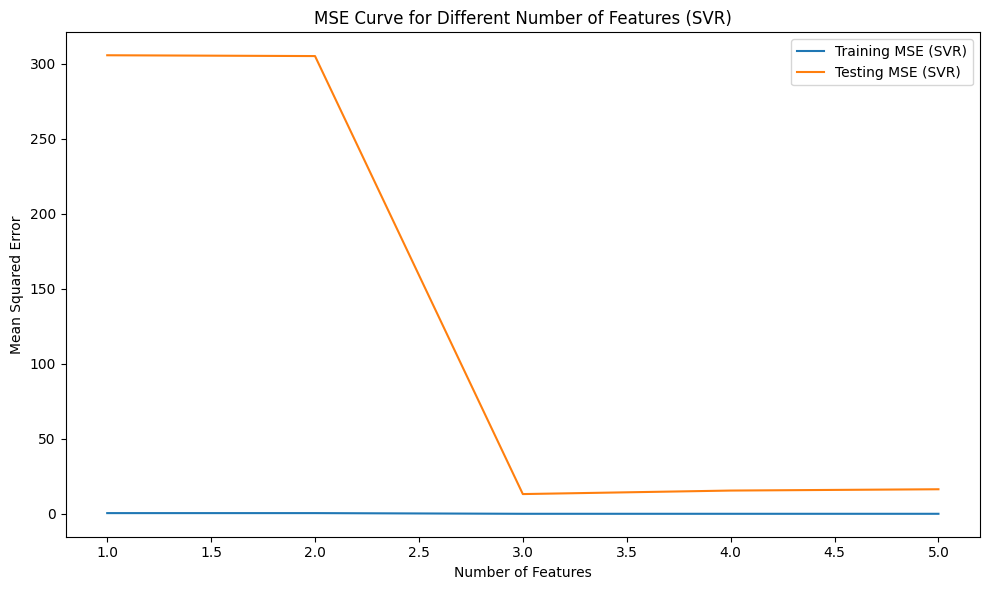

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors_svr = []
test_errors_svr = []

# Split your data into training and testing sets (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the Support Vector Regression (SVR) model
    model_svr = SVR(kernel='linear')  # You can choose a different kernel if needed
    model_svr.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred_svr = model_svr.predict(X_train_subset)
    y_test_pred_svr = model_svr.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error_svr = mean_squared_error(y_train, y_train_pred_svr)
    test_error_svr = mean_squared_error(y_test, y_test_pred_svr)

    # Append the errors to the lists
    train_errors_svr.append(train_error_svr)
    test_errors_svr.append(test_error_svr)

# Plot the MSE curve for SVM
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors_svr, label='Training MSE (SVR)')
plt.plot(num_features, test_errors_svr, label='Testing MSE (SVR)')
plt.title('MSE Curve for Different Number of Features (SVR)')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


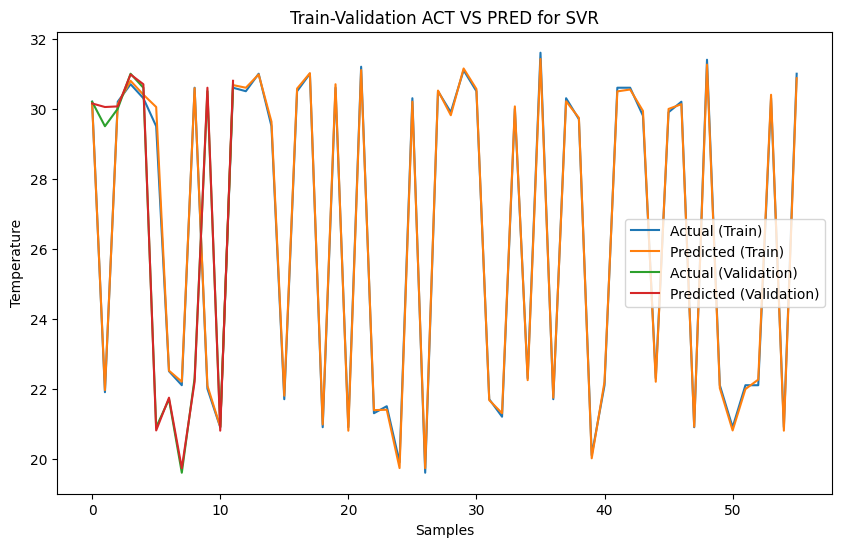

In [ ]:
# Calculate the training set predictions for SVR
y_pred_train_svr = svr_regressor.predict(X_train)

# Calculate the validation set predictions for SVR
y_pred_val_svr = svr_regressor.predict(X_val)

# Plot the train-validation loss curves for SVR
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_svr)), y_pred_train_svr, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_svr)), y_pred_val_svr, label='Predicted (Validation)')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.title('Train-Validation ACT VS PRED for SVR')
plt.legend()
plt.show()


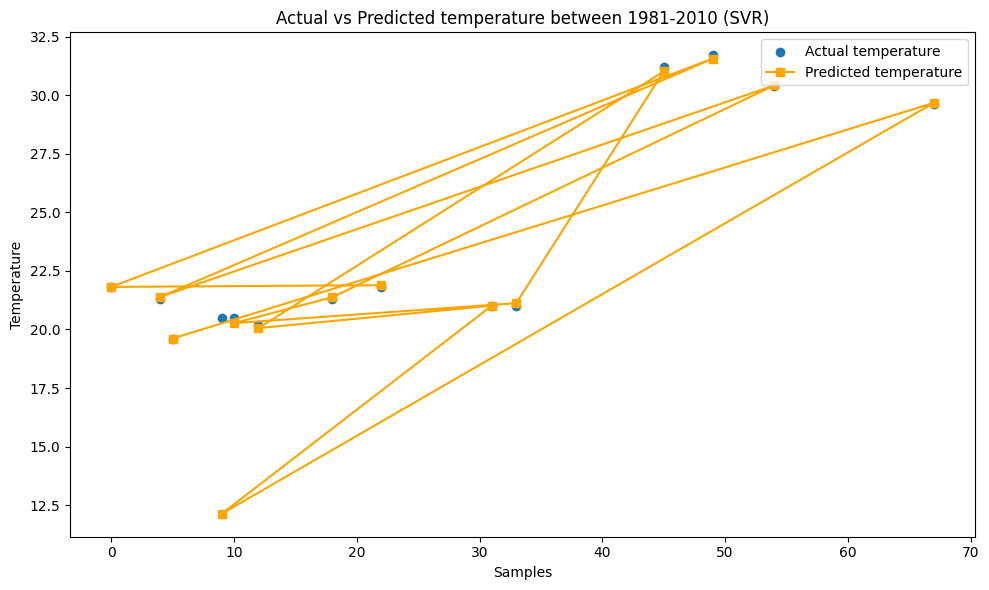

In [ ]:
# Make predictions on the test set using SVR
y_pred_svr = svr_regressor.predict(X_test)

# Create a DataFrame with actual and predicted values for SVR
svr_comparison = pd.DataFrame({'Actual temperature': y_test, 'Predicted temperature': y_pred_svr})

# Plot the actual versus predicted values for SVR
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted temperature between 1981-2010 (SVR)")
plt.scatter(svr_comparison.index, svr_comparison['Actual temperature'], label='Actual temperature', marker='o')
plt.plot(svr_comparison.index, svr_comparison['Predicted temperature'], label='Predicted temperature', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Temperature")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and evaluate a Support Vector Regression (SVR) model
svr_model = SVR(kernel='linear')  # You can choose a different kernel if needed
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, svr_pred)
mse_svr = mean_squared_error(y_test, svr_pred)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, svr_pred)
rmsle_svr = np.sqrt(np.mean(np.log1p(svr_pred) - np.log1p(y_test)) ** 2)
mape_svr = np.mean(np.abs((y_test - svr_pred) / y_test)) * 100

print("\nSupport Vector Regression (SVR) Model:")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"R-squared (R2): {r2_svr:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_svr:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_svr:.2f}%")



Support Vector Regression (SVR) Model:
Mean Absolute Error (MAE): 0.68
Mean Squared Error (MSE): 5.01
Root Mean Squared Error (RMSE): 2.24
R-squared (R2): 0.75
Root Mean Squared Logarithmic Error (RMSLE): 0.04
Mean Absolute Percentage Error (MAPE): 3.28%


**Proposed ensemble model**

Cross-Validation RMSE Scores (Ensemble): [11.47616191  2.41404431  3.59936148  0.14085418  8.18312171]
Mean Cross-Validation RMSE (Ensemble): 5.162708717722574


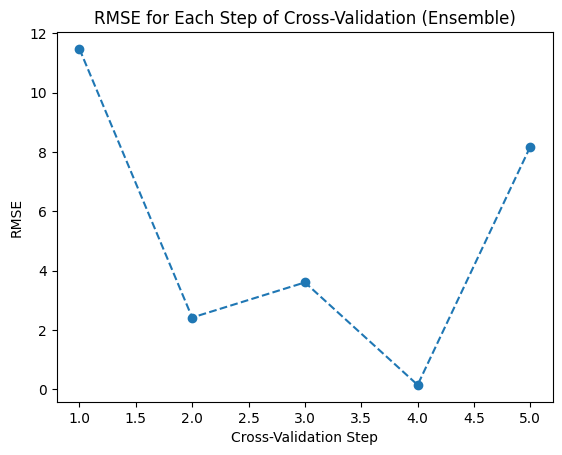

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the individual linear regression model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Create and fit the individual Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

# Combine the models into an ensemble
ensemble_regressor = VotingRegressor(estimators=[
    ('Linear Regression', lr_regressor),
    ('Bayesian Ridge', bayesian_regressor)
])

# Perform cross-validation for RMSE using the ensemble
cv_scores = cross_val_score(ensemble_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores (Ensemble):", cv_rmse_scores)
print("Mean Cross-Validation RMSE (Ensemble):", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation (Ensemble)')
plt.show()


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create and fit the individual linear regression model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Create and fit the individual Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

# Combine the models into an ensemble
ensemble_regressor = VotingRegressor(estimators=[
    ('Linear Regression', lr_regressor),
    ('Bayesian Ridge', bayesian_regressor)
])

# Fit the ensemble model on the training data
ensemble_regressor.fit(X_train, y_train)

# Predict on the test set using the ensemble
y_pred_test_ensemble = ensemble_regressor.predict(X_test)

# Calculate evaluation metrics for the ensemble
mse_ensemble = mean_squared_error(y_test, y_pred_test_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_test_ensemble)

# Print the evaluation metrics for the ensemble model
print("Mean Squared Error (Ensemble):", mse_ensemble)
print("Mean Absolute Error (Ensemble):", mae_ensemble)


Mean Squared Error (Ensemble): 0.4836951577740522
Mean Absolute Error (Ensemble): 0.2687423615967562


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create and fit the individual linear regression model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Create and fit the individual Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

# Predict on the validation set using the individual models
y_pred_val_lr = lr_regressor.predict(X_val)
y_pred_val_bayesian = bayesian_regressor.predict(X_val)

# Combine the models into an ensemble
ensemble_regressor = VotingRegressor(estimators=[
    ('Linear Regression', lr_regressor),
    ('Bayesian Ridge', bayesian_regressor)
])

# Fit the ensemble model on the training data
ensemble_regressor.fit(X_train, y_train)

# Predict on the validation set using the ensemble
y_pred_val_ensemble = ensemble_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val_ensemble = mean_squared_error(y_val, y_pred_val_ensemble)
mae_val_ensemble = mean_absolute_error(y_val, y_pred_val_ensemble)

# Print the evaluation metrics for the ensemble model on the validation set
print("Validation Mean Squared Error (Ensemble):", mse_val_ensemble)
print("Validation Mean Absolute Error (Ensemble):", mae_val_ensemble)


Validation Mean Squared Error (Ensemble): 0.028842399264973454
Validation Mean Absolute Error (Ensemble): 0.10698717460398506


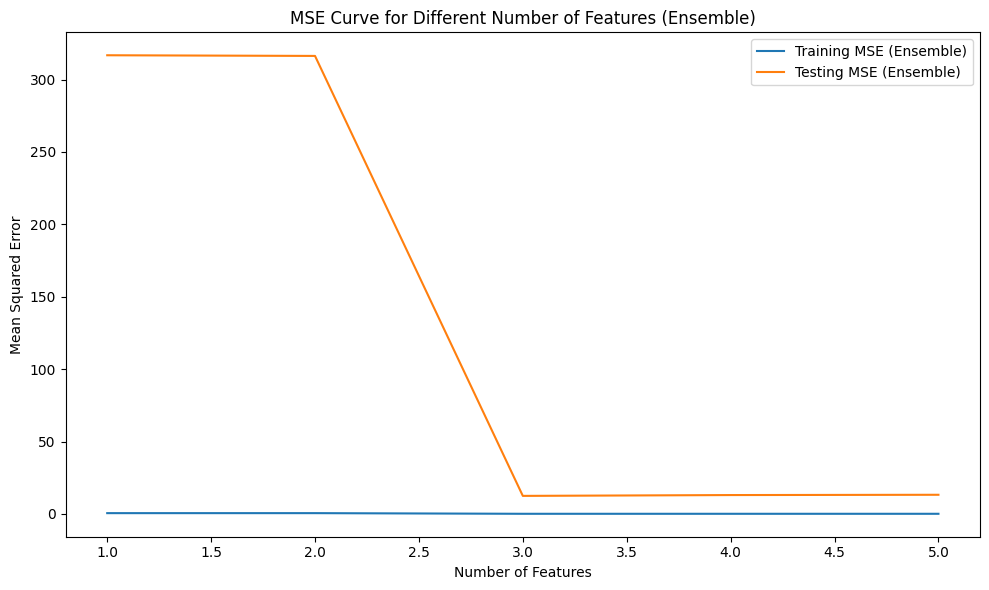

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors = []
test_errors = []

# Split your data into training and testing sets (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the individual linear regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train_subset, y_train)

    # Create and fit the individual Bayesian Ridge Regression model
    bayesian_model = BayesianRidge()
    bayesian_model.fit(X_train_subset, y_train)

    # Combine the models into an ensemble
    ensemble_regressor = VotingRegressor(estimators=[
        ('Linear Regression', lr_model),
        ('Bayesian Ridge', bayesian_model)
    ])

    # Fit the ensemble model on the training data
    ensemble_regressor.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets using the ensemble
    y_train_pred = ensemble_regressor.predict(X_train_subset)
    y_test_pred = ensemble_regressor.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve for the ensemble
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors, label='Training MSE (Ensemble)')
plt.plot(num_features, test_errors, label='Testing MSE (Ensemble)')
plt.title('MSE Curve for Different Number of Features (Ensemble)')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


Linear Regression Training MSE: 0.01198915998270017
Linear Regression Validation MSE: 0.026997925632297474
Bayesian Ridge Training MSE: 0.012805173040055016
Bayesian Ridge Validation MSE: 0.031217804374486263
Ensemble Training MSE: 0.012193163247038877
Ensemble Validation MSE: 0.028842399264973454


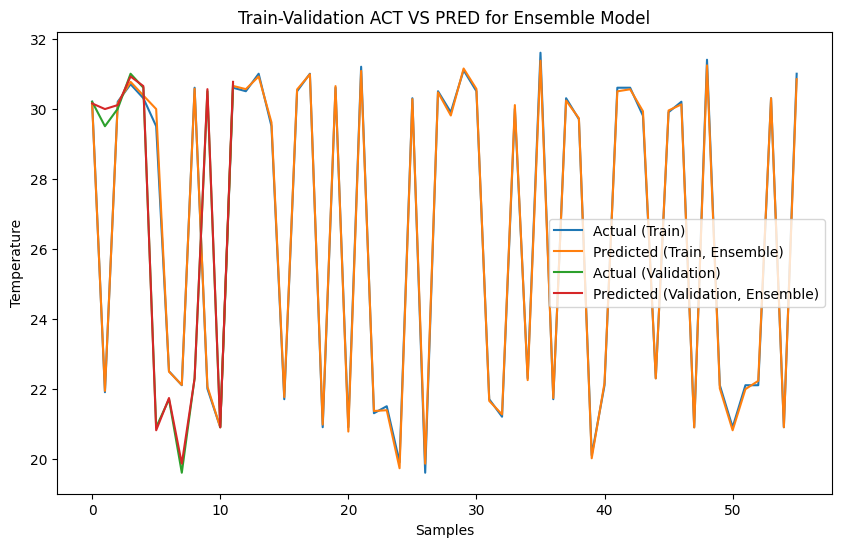

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create and fit the individual linear regression model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Create and fit the individual Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

# Calculate the training set predictions for Linear Regression
y_pred_train_lr = lr_regressor.predict(X_train)

# Calculate the validation set predictions for Linear Regression
y_pred_val_lr = lr_regressor.predict(X_val)

# Calculate the training set predictions for Bayesian Ridge Regression
y_pred_train_bayesian = bayesian_regressor.predict(X_train)

# Calculate the validation set predictions for Bayesian Ridge Regression
y_pred_val_bayesian = bayesian_regressor.predict(X_val)

# Combine the models into an ensemble
ensemble_regressor = VotingRegressor(estimators=[
    ('Linear Regression', lr_regressor),
    ('Bayesian Ridge', bayesian_regressor)
])

# Fit the ensemble model on the training data
ensemble_regressor.fit(X_train, y_train)

# Calculate the training set predictions for the ensemble
y_pred_train_ensemble = ensemble_regressor.predict(X_train)

# Calculate the validation set predictions for the ensemble
y_pred_val_ensemble = ensemble_regressor.predict(X_val)

# Calculate the mean squared errors for the individual models and the ensemble
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_val_lr = mean_squared_error(y_val, y_pred_val_lr)
mse_train_bayesian = mean_squared_error(y_train, y_pred_train_bayesian)
mse_val_bayesian = mean_squared_error(y_val, y_pred_val_bayesian)
mse_train_ensemble = mean_squared_error(y_train, y_pred_train_ensemble)
mse_val_ensemble = mean_squared_error(y_val, y_pred_val_ensemble)

# Print the mean squared errors
print("Linear Regression Training MSE:", mse_train_lr)
print("Linear Regression Validation MSE:", mse_val_lr)
print("Bayesian Ridge Training MSE:", mse_train_bayesian)
print("Bayesian Ridge Validation MSE:", mse_val_bayesian)
print("Ensemble Training MSE:", mse_train_ensemble)
print("Ensemble Validation MSE:", mse_val_ensemble)

# Plot the train-validation loss curves for the ensemble
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_ensemble)), y_pred_train_ensemble, label='Predicted (Train, Ensemble)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_ensemble)), y_pred_val_ensemble, label='Predicted (Validation, Ensemble)')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.title('Train-Validation ACT VS PRED for Ensemble Model')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import VotingRegressor

# Create and evaluate the individual Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Create and evaluate the individual Bayesian Ridge Regression model with default hyperparameter settings
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_pred = bayesian_model.predict(X_test)

# Combine the models into an ensemble
ensemble_regressor = VotingRegressor(estimators=[
    ('Linear Regression', lr_model),
    ('Bayesian Ridge', bayesian_model)
])
ensemble_regressor.fit(X_train, y_train)
ensemble_pred = ensemble_regressor.predict(X_test)

# Evaluate the ensemble model
mae = mean_absolute_error(y_test, ensemble_pred)
mse = mean_squared_error(y_test, ensemble_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ensemble_pred)
rmsle = np.sqrt(np.mean(np.log1p(ensemble_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - ensemble_pred) / y_test)) * 100

print(f"\nEnsemble Model (Linear Regression and Bayesian Ridge Regression):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Ensemble Model (Linear Regression and Bayesian Ridge Regression):
Mean Absolute Error (MAE): 0.27
Mean Squared Error (MSE): 0.48
Root Mean Squared Error (RMSE): 0.70
R-squared (R2): 0.98
Root Mean Squared Logarithmic Error (RMSLE): 0.01
Mean Absolute Percentage Error (MAPE): 1.25%


**Our Ensemble model**

Cross-Validation RMSE Scores (Ensemble): [11.76255414  2.26431247  2.97162828  0.75095738  6.5340547 ]
Mean Cross-Validation RMSE (Ensemble): 4.856701392830211


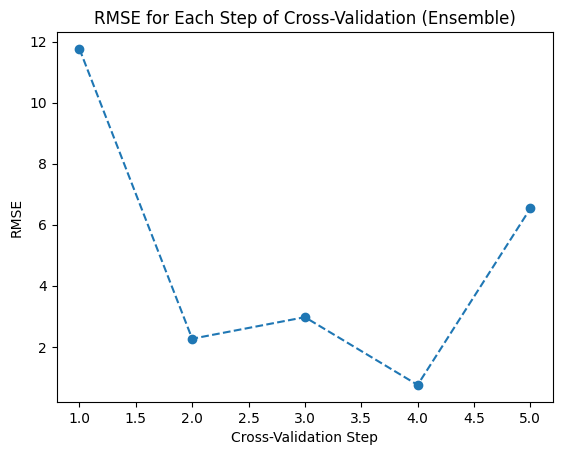

In [ ]:
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data
# Replace X_train and y_train with your actual training data

# Create and fit the individual Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_regressor.fit(X_train, y_train)

# Create and fit the individual Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

# Combine the models into an ensemble
ensemble_regressor = VotingRegressor(estimators=[
    ('Ridge Regression', ridge_regressor),
    ('Bayesian Ridge', bayesian_regressor)
])

# Perform cross-validation for RMSE using the ensemble
cv_scores = cross_val_score(ensemble_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores (Ensemble):", cv_rmse_scores)
print("Mean Cross-Validation RMSE (Ensemble):", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation (Ensemble)')
plt.show()


In [ ]:
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming X_train, y_train, X_test, and y_test are your training and test data
# Replace X_train, y_train, X_test, and y_test with your actual data

# Create and fit the individual Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_regressor.fit(X_train, y_train)

# Create and fit the individual Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

# Combine the models into an ensemble
ensemble_regressor = VotingRegressor(estimators=[
    ('Ridge Regression', ridge_regressor),
    ('Bayesian Ridge', bayesian_regressor)
])

# Fit the ensemble model on the training data
ensemble_regressor.fit(X_train, y_train)

# Predict on the test set using the ensemble
y_pred_test_ensemble = ensemble_regressor.predict(X_test)

# Calculate evaluation metrics for the ensemble
mse_ensemble = mean_squared_error(y_test, y_pred_test_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_test_ensemble)

# Print the evaluation metrics for the ensemble model
print("Mean Squared Error (Ensemble):", mse_ensemble)
print("Mean Absolute Error (Ensemble):", mae_ensemble)


Mean Squared Error (Ensemble): 0.014341921233873735
Mean Absolute Error (Ensemble): 0.08880572785604558


In [ ]:
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming X_train, y_train, X_val, and y_val are your training and validation data
# Replace X_train, y_train, X_val, and y_val with your actual data

# Create and fit the individual Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_regressor.fit(X_train, y_train)

# Create and fit the individual Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

# Predict on the validation set using the individual models
y_pred_val_ridge = ridge_regressor.predict(X_val)
y_pred_val_bayesian = bayesian_regressor.predict(X_val)

# Combine the models into an ensemble
ensemble_regressor = VotingRegressor(estimators=[
    ('Ridge Regression', ridge_regressor),
    ('Bayesian Ridge', bayesian_regressor)
])

# Fit the ensemble model on the training data
ensemble_regressor.fit(X_train, y_train)

# Predict on the validation set using the ensemble
y_pred_val_ensemble = ensemble_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val_ensemble = mean_squared_error(y_val, y_pred_val_ensemble)
mae_val_ensemble = mean_absolute_error(y_val, y_pred_val_ensemble)

# Print the evaluation metrics for the ensemble model on the validation set
print("Validation Mean Squared Error (Ensemble):", mse_val_ensemble)
print("Validation Mean Absolute Error (Ensemble):", mae_val_ensemble)


Validation Mean Squared Error (Ensemble): 0.03156680716608042
Validation Mean Absolute Error (Ensemble): 0.11320492312243531


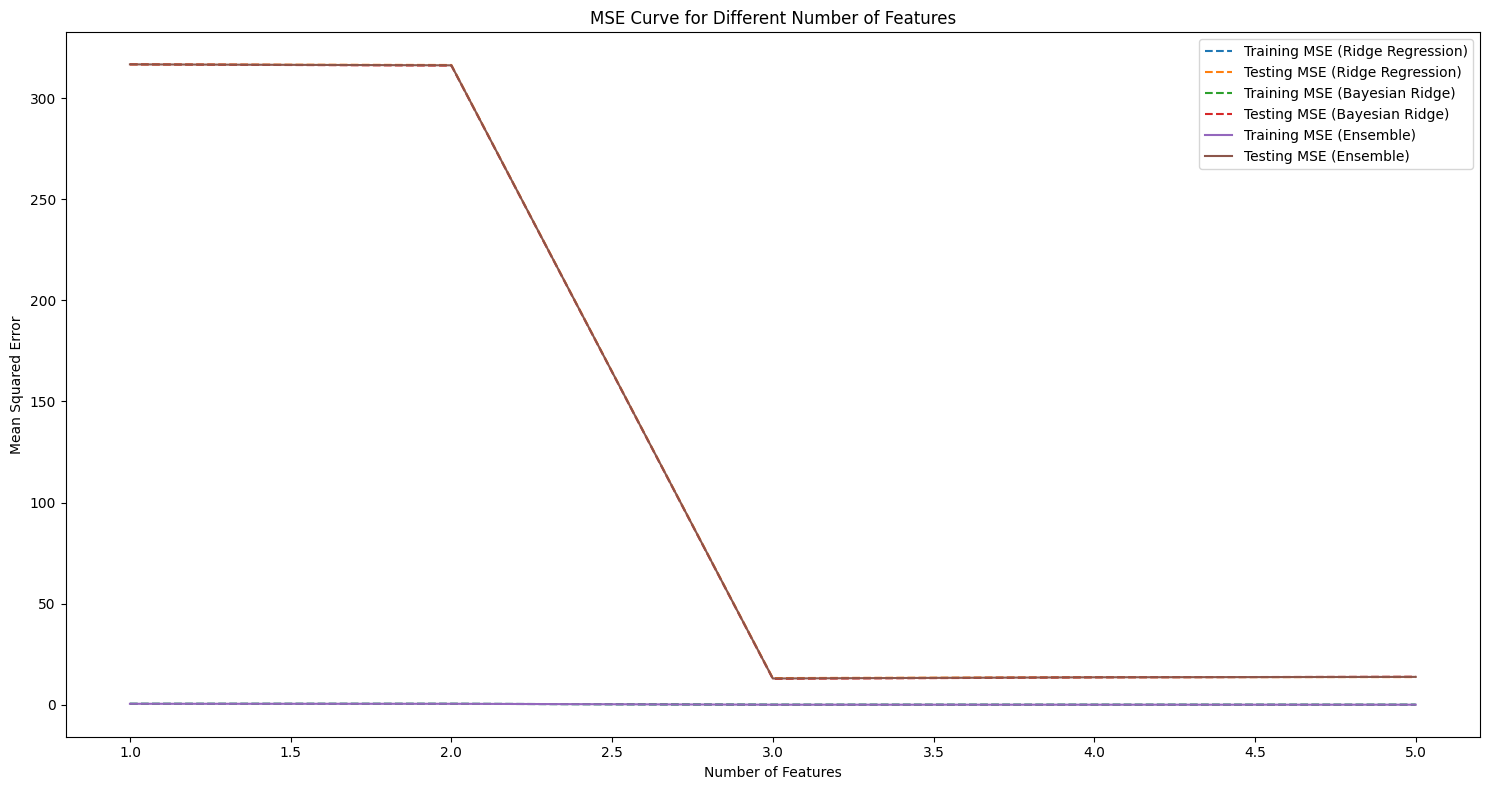

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, BayesianRidge

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors_ridge = []
test_errors_ridge = []

train_errors_bayesian = []
test_errors_bayesian = []

train_errors_ensemble = []
test_errors_ensemble = []

# Split your data into training and testing sets (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the individual Ridge Regression model
    ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
    ridge_model.fit(X_train_subset, y_train)

    # Create and fit the individual Bayesian Ridge Regression model
    bayesian_model = BayesianRidge()
    bayesian_model.fit(X_train_subset, y_train)

    # Combine the models into an ensemble
    ensemble_regressor = VotingRegressor(estimators=[
        ('Ridge Regression', ridge_model),
        ('Bayesian Ridge', bayesian_model)
    ])

    # Fit the ensemble model on the training data
    ensemble_regressor.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets using individual models and ensemble
    y_train_pred_ridge = ridge_model.predict(X_train_subset)
    y_test_pred_ridge = ridge_model.predict(X_test_subset)

    y_train_pred_bayesian = bayesian_model.predict(X_train_subset)
    y_test_pred_bayesian = bayesian_model.predict(X_test_subset)

    y_train_pred_ensemble = ensemble_regressor.predict(X_train_subset)
    y_test_pred_ensemble = ensemble_regressor.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error_ridge = mean_squared_error(y_train, y_train_pred_ridge)
    test_error_ridge = mean_squared_error(y_test, y_test_pred_ridge)

    train_error_bayesian = mean_squared_error(y_train, y_train_pred_bayesian)
    test_error_bayesian = mean_squared_error(y_test, y_test_pred_bayesian)

    train_error_ensemble = mean_squared_error(y_train, y_train_pred_ensemble)
    test_error_ensemble = mean_squared_error(y_test, y_test_pred_ensemble)

    # Append the errors to the lists
    train_errors_ridge.append(train_error_ridge)
    test_errors_ridge.append(test_error_ridge)

    train_errors_bayesian.append(train_error_bayesian)
    test_errors_bayesian.append(test_error_bayesian)

    train_errors_ensemble.append(train_error_ensemble)
    test_errors_ensemble.append(test_error_ensemble)

# Plot the MSE curves for Ridge Regression, Bayesian Ridge Regression, and Ensemble
plt.figure(figsize=(15, 8))

plt.plot(num_features, train_errors_ridge, label='Training MSE (Ridge Regression)', linestyle='--')
plt.plot(num_features, test_errors_ridge, label='Testing MSE (Ridge Regression)', linestyle='--')

plt.plot(num_features, train_errors_bayesian, label='Training MSE (Bayesian Ridge)', linestyle='--')
plt.plot(num_features, test_errors_bayesian, label='Testing MSE (Bayesian Ridge)', linestyle='--')

plt.plot(num_features, train_errors_ensemble, label='Training MSE (Ensemble)')
plt.plot(num_features, test_errors_ensemble, label='Testing MSE (Ensemble)')

plt.title('MSE Curve for Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


Ridge Regression Training MSE: 0.013050232028143618
Ridge Regression Validation MSE: 0.03192836540656466
Bayesian Ridge Training MSE: 0.012805173040055016
Bayesian Ridge Validation MSE: 0.031217804374486263
Ensemble Training MSE: 0.012923349368387503
Ensemble Validation MSE: 0.03156680716608042


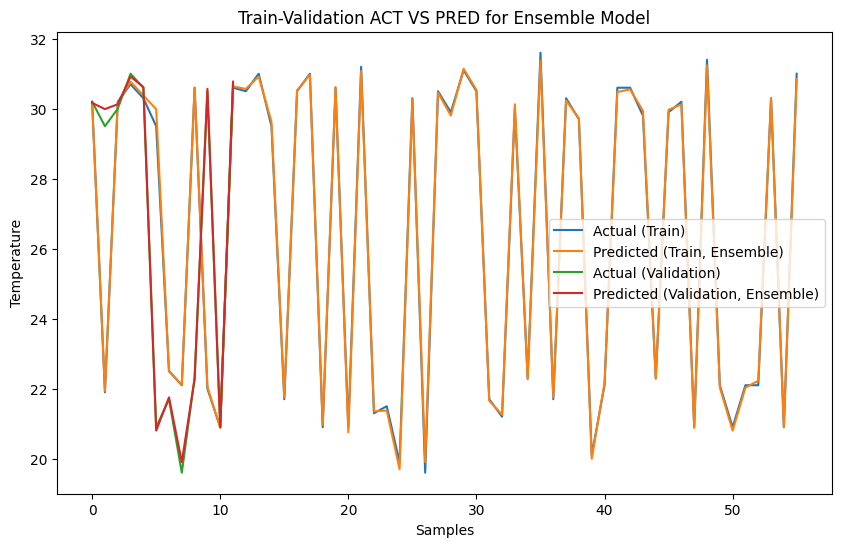

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, BayesianRidge

# Create and fit the individual Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_regressor.fit(X_train, y_train)

# Create and fit the individual Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

# Calculate the training set predictions for Ridge Regression
y_pred_train_ridge = ridge_regressor.predict(X_train)

# Calculate the validation set predictions for Ridge Regression
y_pred_val_ridge = ridge_regressor.predict(X_val)

# Calculate the training set predictions for Bayesian Ridge Regression
y_pred_train_bayesian = bayesian_regressor.predict(X_train)

# Calculate the validation set predictions for Bayesian Ridge Regression
y_pred_val_bayesian = bayesian_regressor.predict(X_val)

# Combine the models into an ensemble
ensemble_regressor = VotingRegressor(estimators=[
    ('Ridge Regression', ridge_regressor),
    ('Bayesian Ridge', bayesian_regressor)
])

# Fit the ensemble model on the training data
ensemble_regressor.fit(X_train, y_train)

# Calculate the training set predictions for the ensemble
y_pred_train_ensemble = ensemble_regressor.predict(X_train)

# Calculate the validation set predictions for the ensemble
y_pred_val_ensemble = ensemble_regressor.predict(X_val)

# Calculate the mean squared errors for the individual models and the ensemble
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_val_ridge = mean_squared_error(y_val, y_pred_val_ridge)
mse_train_bayesian = mean_squared_error(y_train, y_pred_train_bayesian)
mse_val_bayesian = mean_squared_error(y_val, y_pred_val_bayesian)
mse_train_ensemble = mean_squared_error(y_train, y_pred_train_ensemble)
mse_val_ensemble = mean_squared_error(y_val, y_pred_val_ensemble)

# Print the mean squared errors
print("Ridge Regression Training MSE:", mse_train_ridge)
print("Ridge Regression Validation MSE:", mse_val_ridge)
print("Bayesian Ridge Training MSE:", mse_train_bayesian)
print("Bayesian Ridge Validation MSE:", mse_val_bayesian)
print("Ensemble Training MSE:", mse_train_ensemble)
print("Ensemble Validation MSE:", mse_val_ensemble)

# Plot the train-validation loss curves for the ensemble
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train_ensemble)), y_pred_train_ensemble, label='Predicted (Train, Ensemble)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val_ensemble)), y_pred_val_ensemble, label='Predicted (Validation, Ensemble)')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.title('Train-Validation ACT VS PRED for Ensemble Model')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate the individual Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Create and evaluate the individual Bayesian Ridge Regression model
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_pred = bayesian_model.predict(X_test)

# Combine the models into an ensemble
ensemble_regressor = VotingRegressor(estimators=[
    ('Ridge Regression', ridge_model),
    ('Bayesian Ridge', bayesian_model)
])
ensemble_regressor.fit(X_train, y_train)
ensemble_pred = ensemble_regressor.predict(X_test)

# Evaluate the ensemble model
mae = mean_absolute_error(y_test, ensemble_pred)
mse = mean_squared_error(y_test, ensemble_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ensemble_pred)
rmsle = np.sqrt(np.mean(np.log1p(ensemble_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - ensemble_pred) / y_test)) * 100

print(f"\nEnsemble Model (Ridge Regression and Bayesian Ridge Regression):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Ensemble Model (Ridge Regression and Bayesian Ridge Regression):
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.12
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 0.37%


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming X_train, y_train, X_test, and y_test are your training and test data
# Replace X_train, y_train, X_test, and y_test with your actual data

# Create and fit the Gradient Boosting model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

# Predict on the test set using the Gradient Boosting model
y_pred_test_gb = gb_regressor.predict(X_test)

# Calculate evaluation metrics for the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_test_gb)
mae_gb = mean_absolute_error(y_test, y_pred_test_gb)
r2_gb = r2_score(y_test, y_pred_test_gb)
rmse_gb = np.sqrt(mse_gb)
rmsle_gb = np.sqrt(np.mean(np.log1p(y_pred_test_gb) - np.log1p(y_test)) ** 2)
mape_gb = np.mean(np.abs((y_test - y_pred_test_gb) / y_test)) * 100

# Print the evaluation metrics for the Gradient Boosting model
print("Mean Squared Error (GB):", mse_gb)
print("Mean Absolute Error (GB):", mae_gb)
print("R-squared (GB):", r2_gb)
print("Root Mean Squared Error (GB):", rmse_gb)
print("Root Mean Squared Logarithmic Error (GB):", rmsle_gb)
print("Mean Absolute Percentage Error (GB):", mape_gb)


Mean Squared Error (GB): 0.03280953284592568
Mean Absolute Error (GB): 0.15721832353947665
R-squared (GB): 0.9983758190305427
Root Mean Squared Error (GB): 0.1811340190188626
Root Mean Squared Logarithmic Error (GB): 0.0008000402232561297
Mean Absolute Percentage Error (GB): 0.6790444555123225


In [ ]:
import numpy as np

# Assuming X_train represents your training data
# Replace X_train with your actual training data

# ... (previous code remains the same)

# Create and fit the individual Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

# Create and fit the individual Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

# Combine the models into an ensemble
ensemble_regressor = VotingRegressor(estimators=[
    ('Ridge Regression', ridge_regressor),
    ('Bayesian Ridge', bayesian_regressor)
])

# Fit the ensemble model on the training data
ensemble_regressor.fit(X_train, y_train)

# Assuming X_predict represents the new data for which you want to make predictions
# Replace X_predict with your actual data
#X_predict = np.array([10, 12.5, 17.5, 21.3, 22.9, 24.8, 25.1, 25.3, 24.7, 22.2, 16.7, 11.9]).reshape(1, -1)

#X_predict = np.array([13.7, 13.9, 19.5, 22.7, 23.9, 24.9, 26.7, 26.6, 25.9, 23.6, 18.6, 18.0]).reshape(1, -1)

X_predict = np.array([25.7, 28.3, 33.6, 33.7, 33.7, 32.8, 32.8, 32.9, 32.5, 32.4, 30.5, 28]).reshape(1, -1)



# Check the number of features used during training
num_features_used = X_train.shape[1]

# Ensure X_predict has the same number of features
if X_predict.shape[1] != num_features_used:
    raise ValueError(f"Number of features in X_predict ({X_predict.shape[1]}) does not match the number of features used during training ({num_features_used}).")

# Make predictions using individual models and the ensemble for the new data (X_predict)
y_pred_ridge = ridge_regressor.predict(X_predict)
y_pred_bayesian = bayesian_regressor.predict(X_predict)
y_pred_ensemble = ensemble_regressor.predict(X_predict)

# Print or use the predicted temperatures
print("Ridge Regression Predictions:", y_pred_ridge)
print("Bayesian Ridge Predictions:", y_pred_bayesian)
print("Ensemble Predictions:", y_pred_ensemble)


Ridge Regression Predictions: [31.79890584]
Bayesian Ridge Predictions: [31.80591187]
Ensemble Predictions: [31.80240885]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


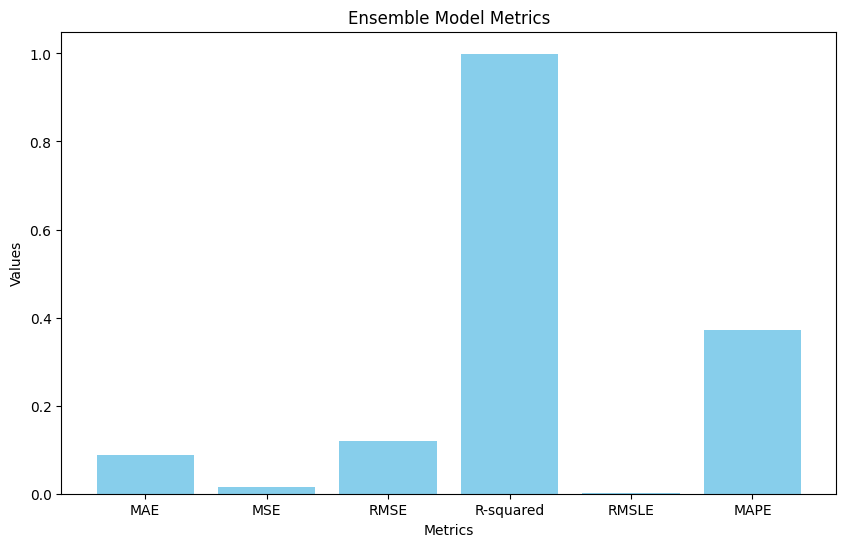

In [ ]:
import matplotlib.pyplot as plt

# Metrics for the ensemble model
metrics = ['MAE', 'MSE', 'RMSE', 'R-squared', 'RMSLE', 'MAPE']
values = [mae, mse, rmse, r2, rmsle, mape]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')
plt.title("Ensemble Model Metrics")
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.show()


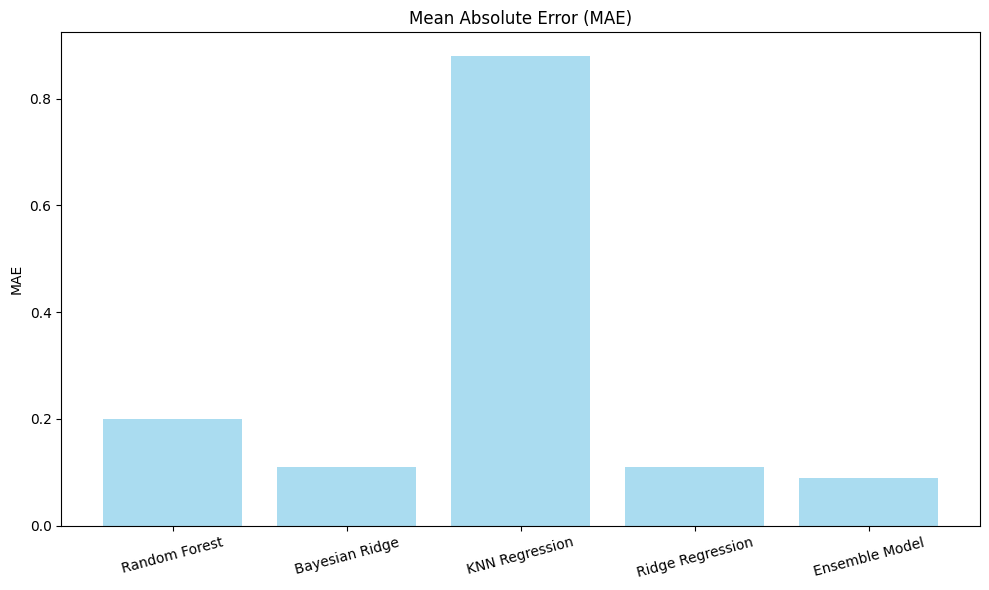

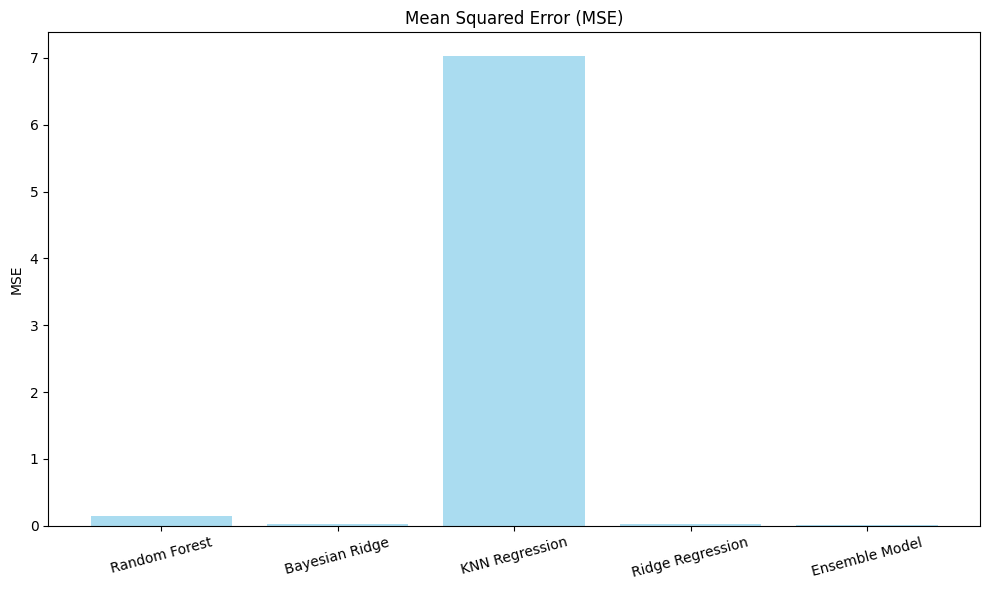

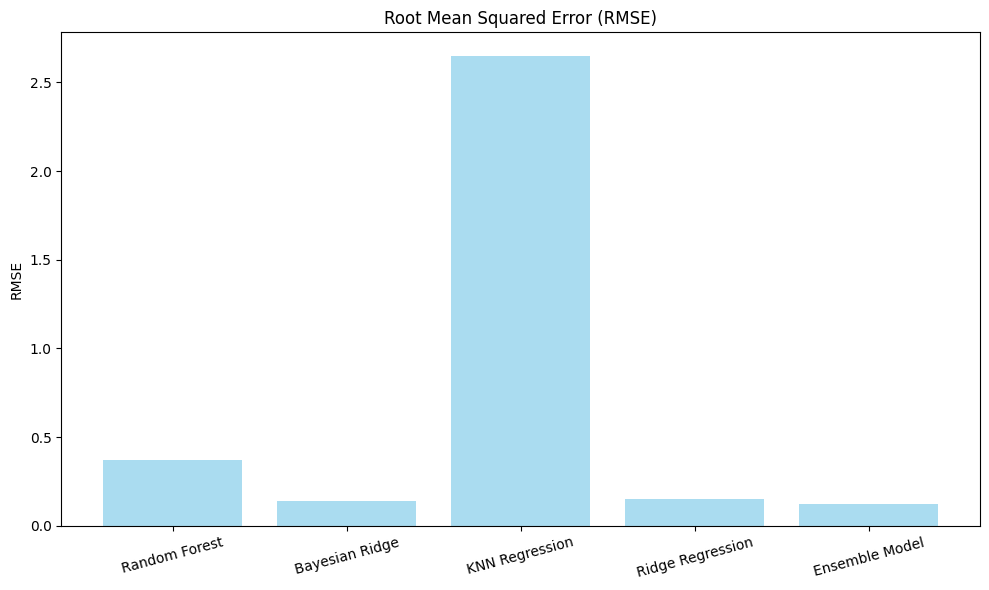

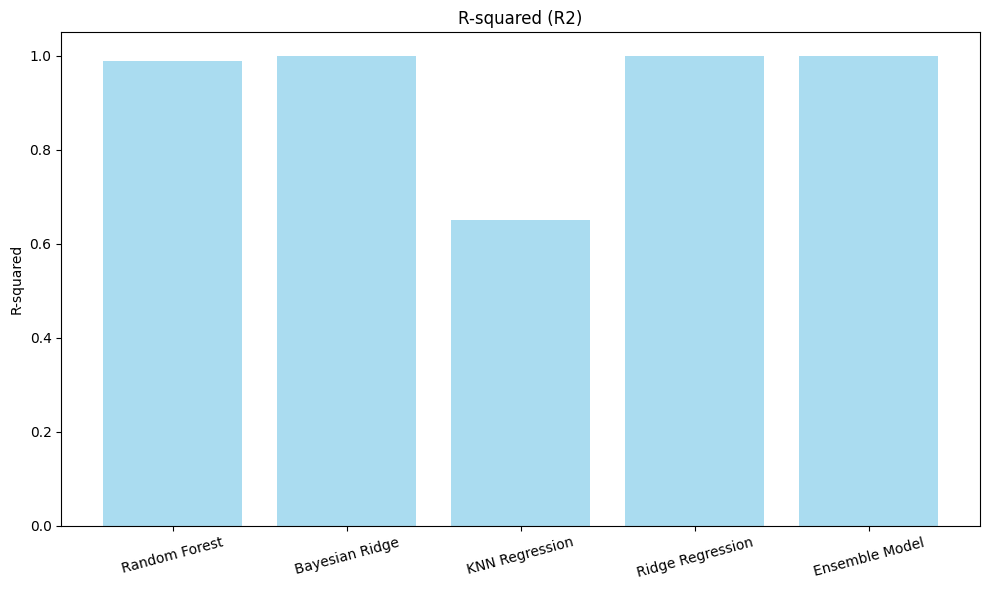

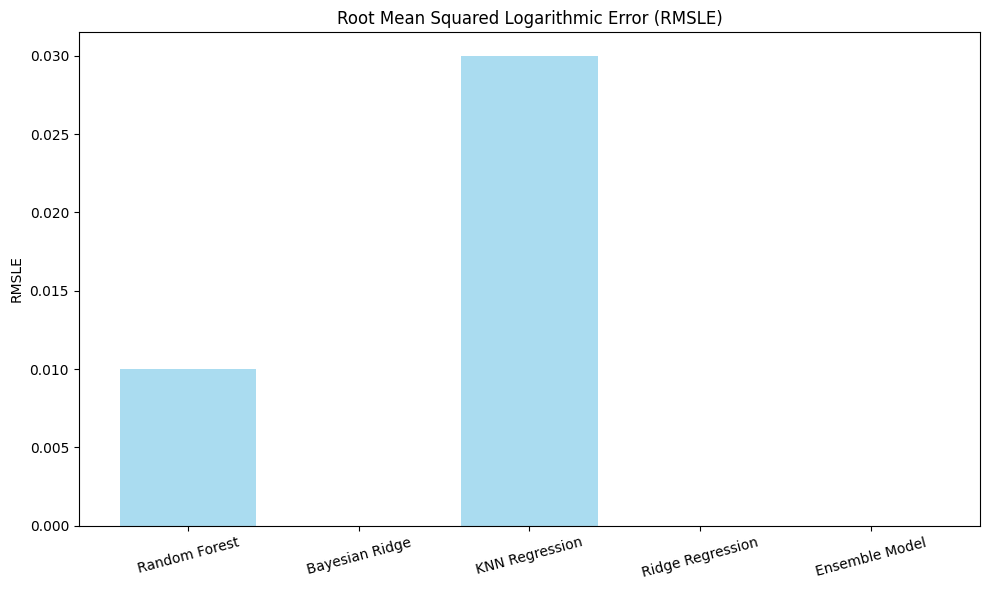

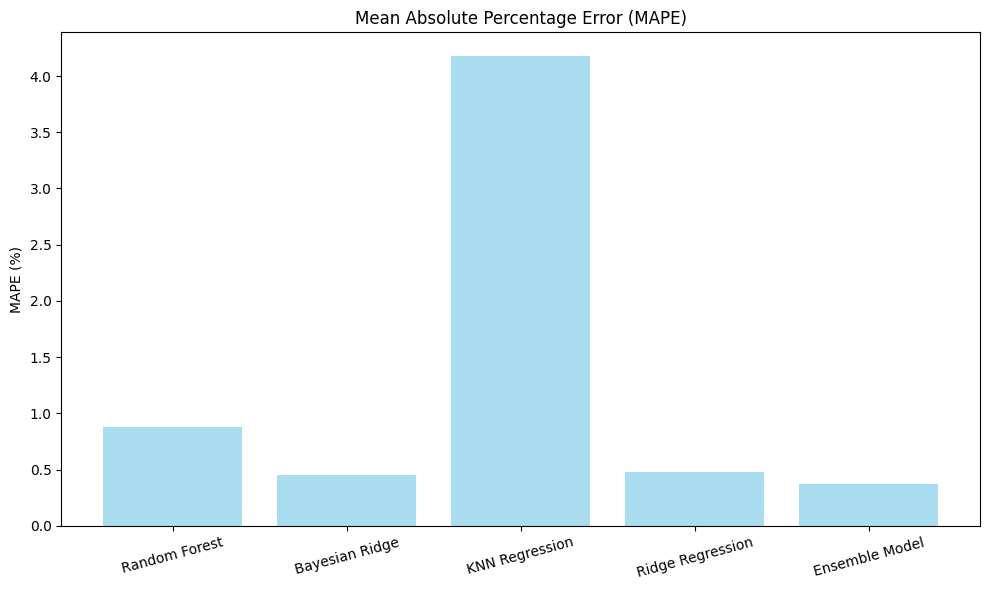

In [ ]:
import matplotlib.pyplot as plt

# Sample data for MAE, MSE, RMSE, R-squared, RMSLE, MAPE
models = ['Random Forest', 'Bayesian Ridge', 'KNN Regression', 'Ridge Regression',   'Ensemble Model']
mae = [0.20, 0.11, 0.88, 0.11, 0.09]
mse = [0.14, 0.02, 7.03, 0.02, 0.01]
rmse = [0.37, 0.14, 2.65, 0.15, 0.12]
r2 = [0.99, 1.00, 0.65, 1.00, 1.00]
rmsle = [0.01, 0.00, 0.03, 0.00, 0.00]
mape = [0.88, 0.45, 4.18, 0.48, 0.37]

# Create separate bar plots for each metric
def create_bar_plot(data, metric_name, ylabel):
    plt.figure(figsize=(10, 6))
    plt.bar(models, data, color='skyblue', alpha=0.7)
    plt.ylabel(ylabel)
    plt.title(metric_name)
    plt.xticks(rotation=15)
    plt.tight_layout()

create_bar_plot(mae, 'Mean Absolute Error (MAE)', 'MAE')
plt.show()

create_bar_plot(mse, 'Mean Squared Error (MSE)', 'MSE')
plt.show()

create_bar_plot(rmse, 'Root Mean Squared Error (RMSE)', 'RMSE')
plt.show()

create_bar_plot(r2, 'R-squared (R2)', 'R-squared')
plt.show()

create_bar_plot(rmsle, 'Root Mean Squared Logarithmic Error (RMSLE)', 'RMSLE')
plt.show()

create_bar_plot(mape, 'Mean Absolute Percentage Error (MAPE)', 'MAPE (%)')
plt.show()


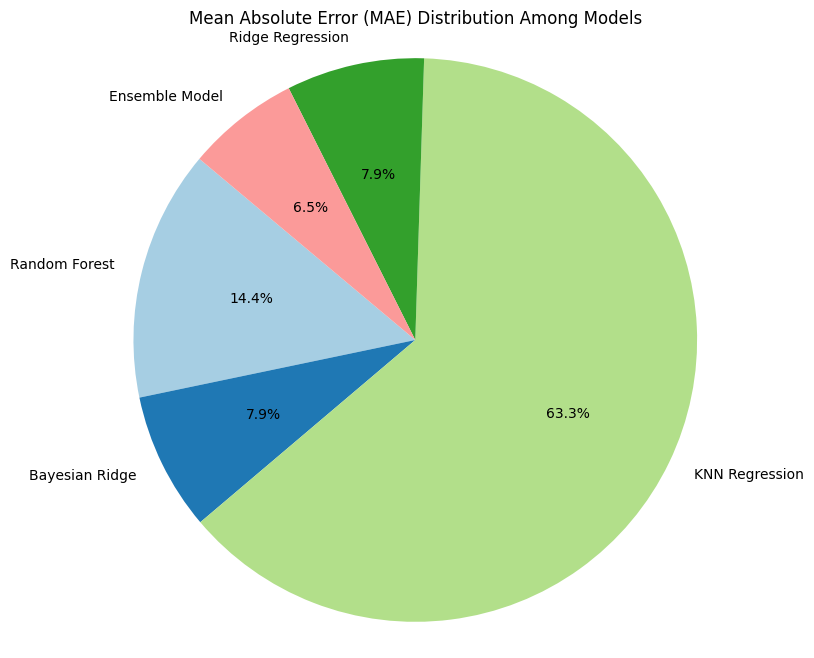

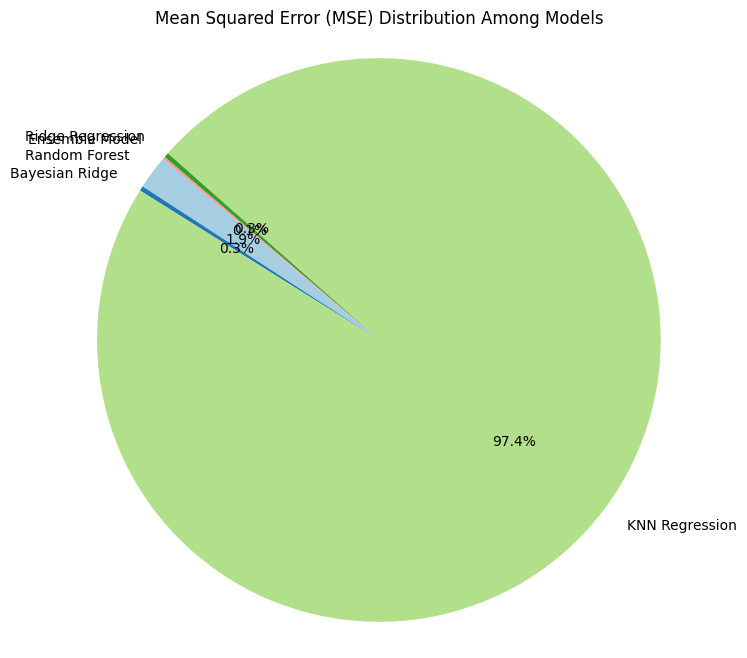

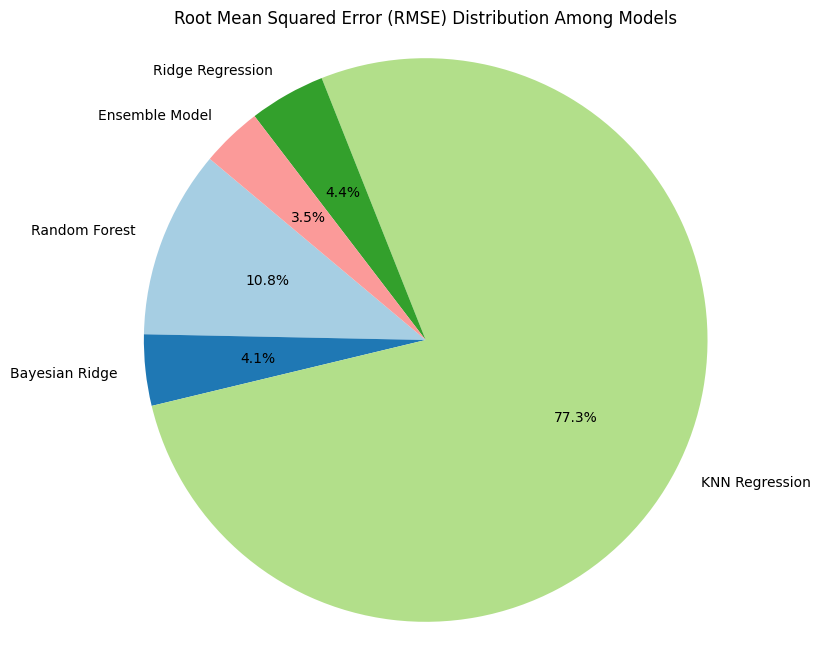

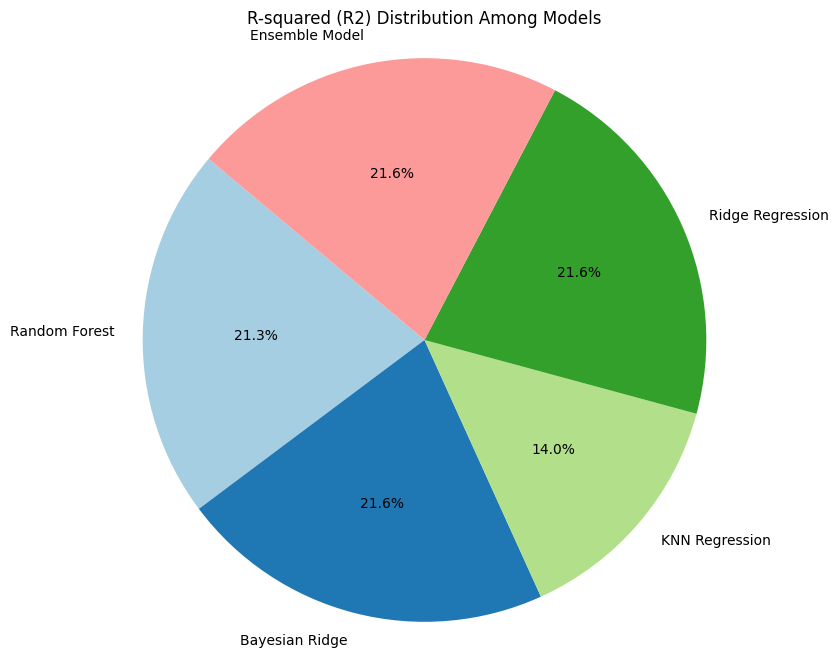

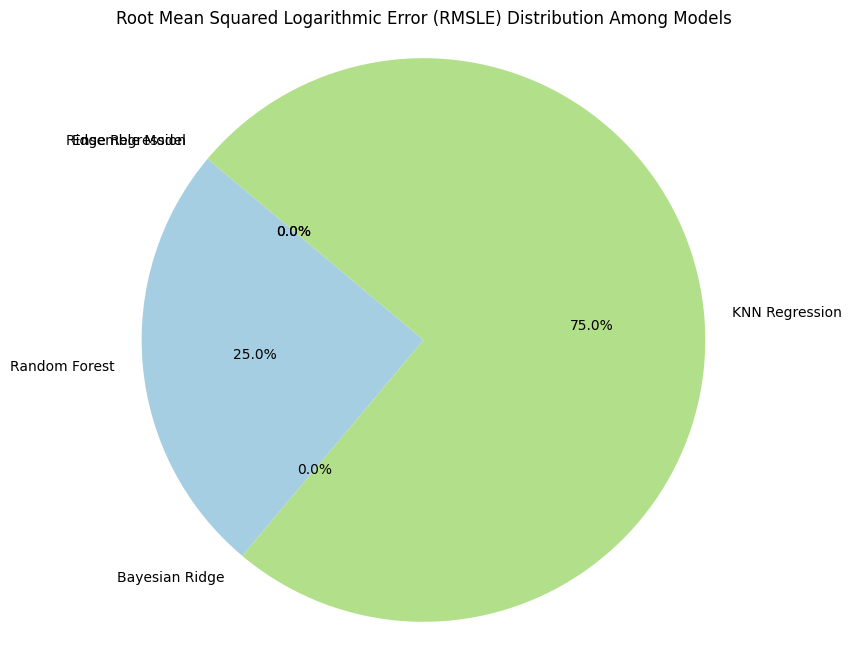

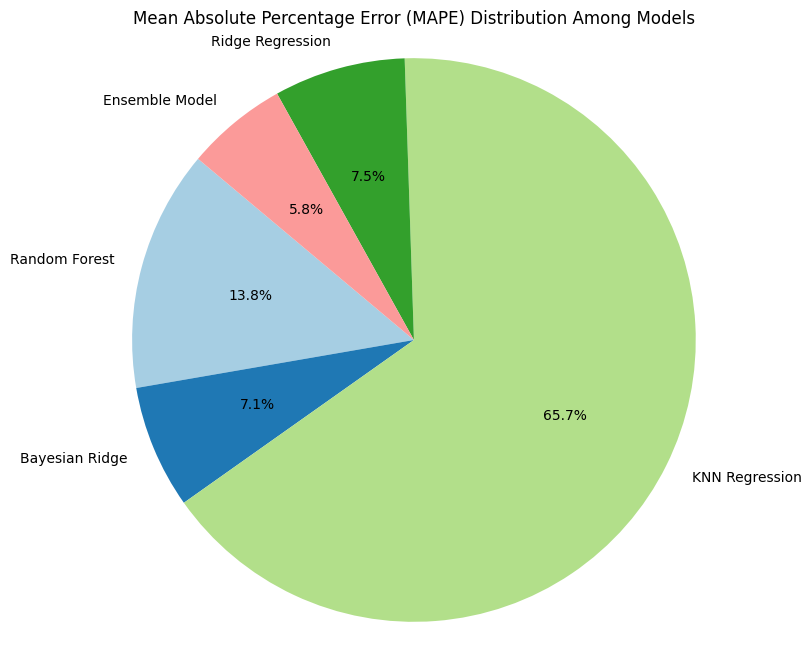

In [ ]:
import matplotlib.pyplot as plt

# Sample data for MAE, MSE, RMSE, R-squared, RMSLE, MAPE
models = ['Random Forest', 'Bayesian Ridge', 'KNN Regression', 'Ridge Regression', 'Ensemble Model']
mae = [0.20, 0.11, 0.88, 0.11, 0.09]
mse = [0.14, 0.02, 7.03, 0.02, 0.01]
rmse = [0.37, 0.14, 2.65, 0.15, 0.12]
r2 = [0.99, 1.00, 0.65, 1.00, 1.00]
rmsle = [0.01, 0.00, 0.03, 0.00, 0.00]
mape = [0.88, 0.45, 4.18, 0.48, 0.37]

# Function to create pie chart for each metric
def create_pie_chart(data, metric_name):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=models, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'{metric_name} Distribution Among Models')
    plt.show()

create_pie_chart(mae, 'Mean Absolute Error (MAE)')
create_pie_chart(mse, 'Mean Squared Error (MSE)')
create_pie_chart(rmse, 'Root Mean Squared Error (RMSE)')
create_pie_chart(r2, 'R-squared (R2)')
create_pie_chart(rmsle, 'Root Mean Squared Logarithmic Error (RMSLE)')
create_pie_chart(mape, 'Mean Absolute Percentage Error (MAPE)')


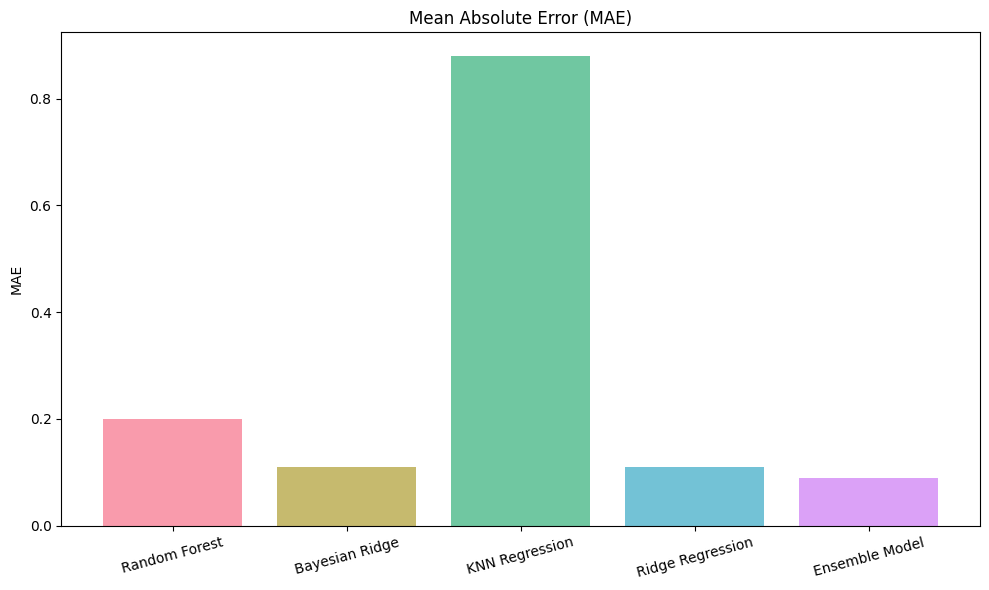

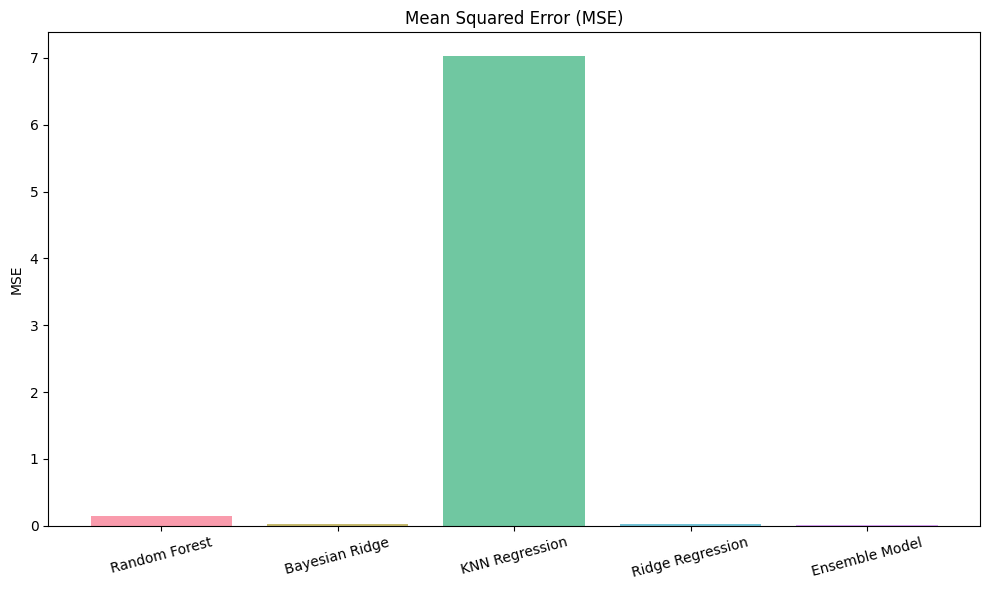

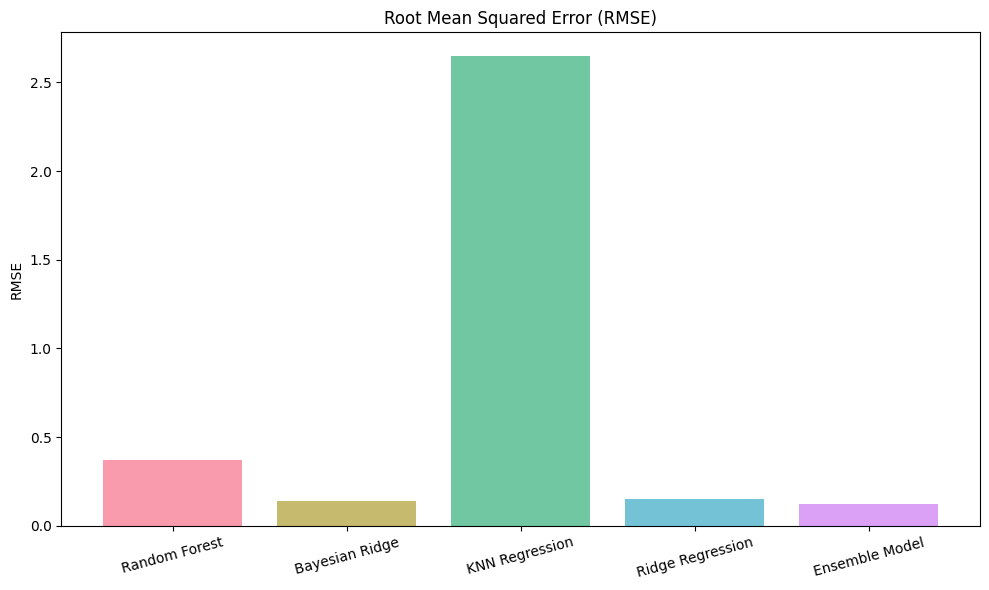

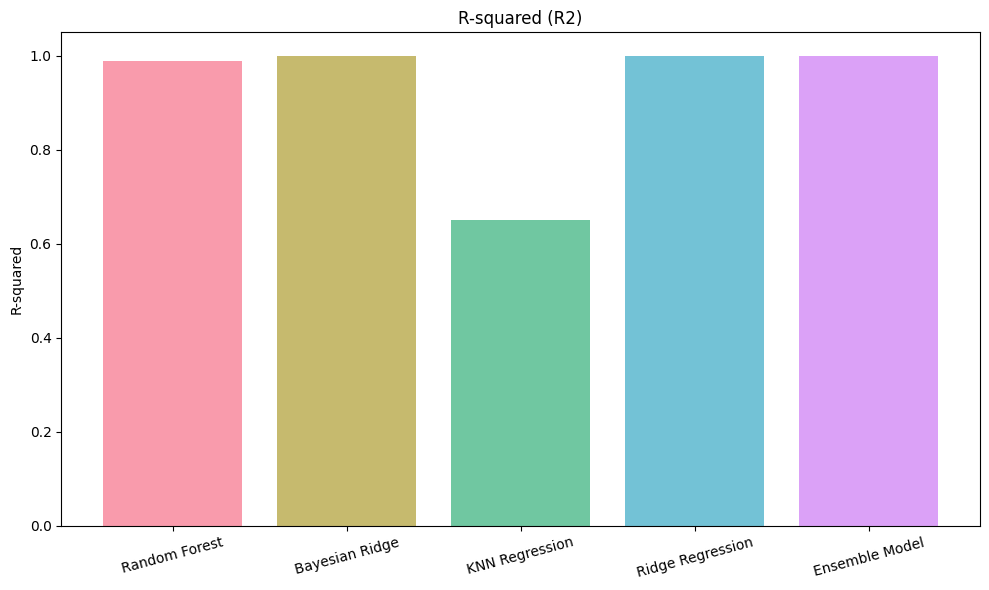

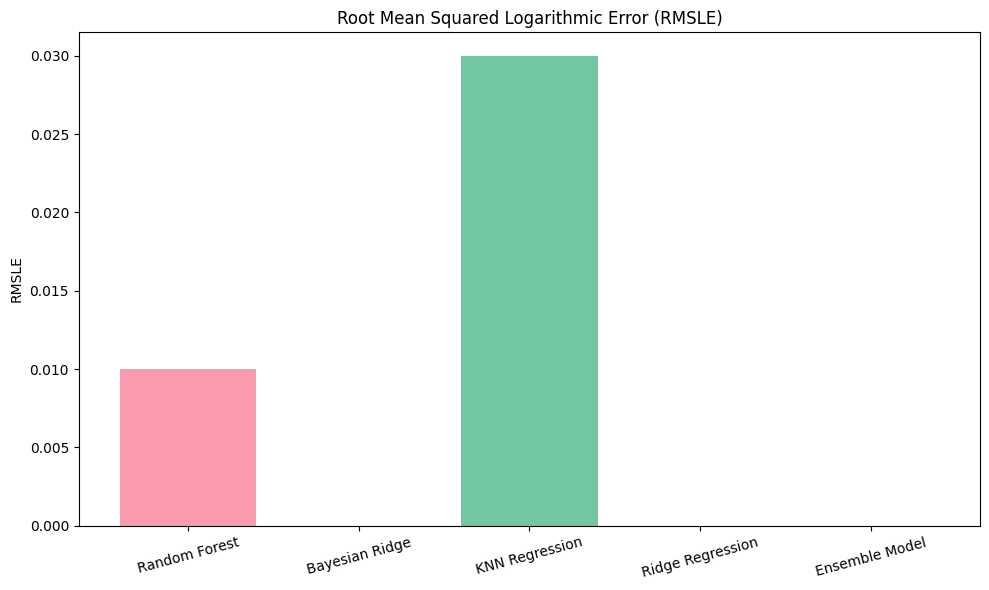

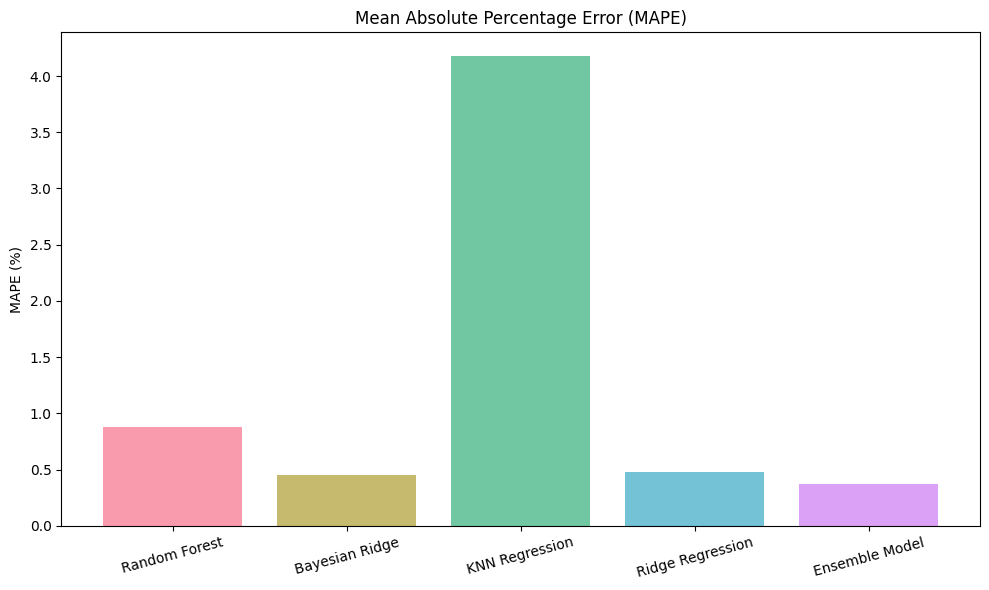

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for MAE, MSE, RMSE, R-squared, RMSLE, MAPE
models = ['Random Forest', 'Bayesian Ridge', 'KNN Regression', 'Ridge Regression', 'Ensemble Model']
mae = [0.20, 0.11, 0.88, 0.11, 0.09]
mse = [0.14, 0.02, 7.03, 0.02, 0.01]
rmse = [0.37, 0.14, 2.65, 0.15, 0.12]
r2 = [0.99, 1.00, 0.65, 1.00, 1.00]
rmsle = [0.01, 0.00, 0.03, 0.00, 0.00]
mape = [0.88, 0.45, 4.18, 0.48, 0.37]

# Create a custom color palette
colors = sns.color_palette("husl", len(models))

# Function to create bar chart with unique colors
def create_colorful_bar_chart(data, metric_name, ylabel):
    plt.figure(figsize=(10, 6))
    plt.bar(models, data, color=colors, alpha=0.7)
    plt.ylabel(ylabel)
    plt.title(metric_name)
    plt.xticks(rotation=15)
    plt.tight_layout()

create_colorful_bar_chart(mae, 'Mean Absolute Error (MAE)', 'MAE')
plt.show()

create_colorful_bar_chart(mse, 'Mean Squared Error (MSE)', 'MSE')
plt.show()

create_colorful_bar_chart(rmse, 'Root Mean Squared Error (RMSE)', 'RMSE')
plt.show()

create_colorful_bar_chart(r2, 'R-squared (R2)', 'R-squared')
plt.show()

create_colorful_bar_chart(rmsle, 'Root Mean Squared Logarithmic Error (RMSLE)', 'RMSLE')
plt.show()

create_colorful_bar_chart(mape, 'Mean Absolute Percentage Error (MAPE)', 'MAPE (%)')
plt.show()


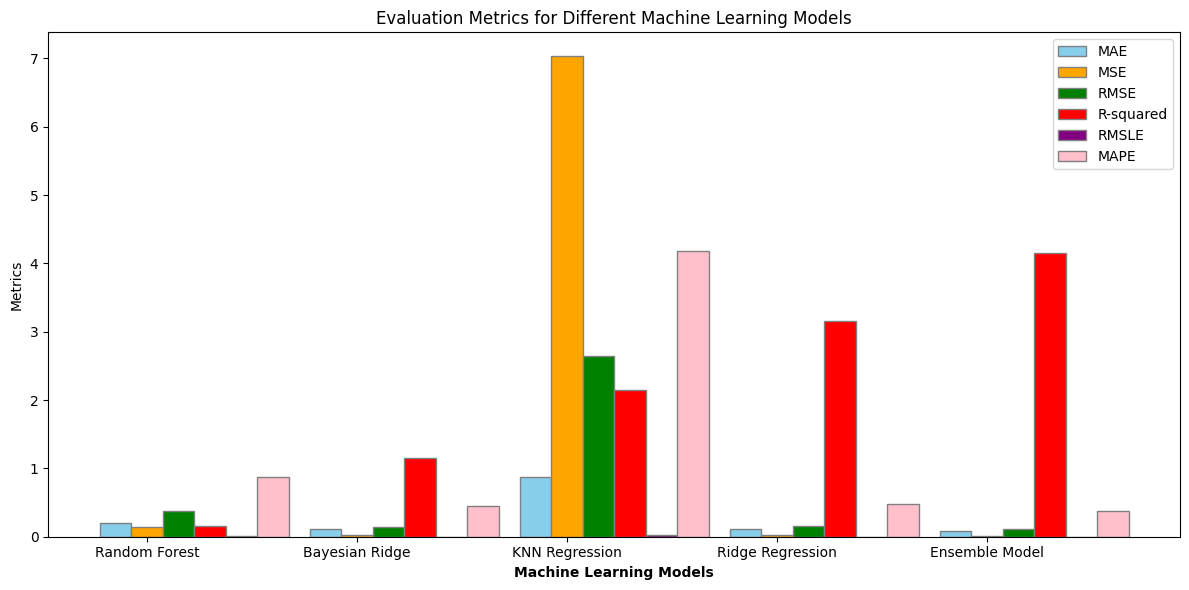

In [ ]:
import numpy as np

# Set width of the bar
bar_width = 0.15

# Set position of the bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Create grouped bar plots
plt.figure(figsize=(12, 6))
plt.bar(r1, mae, color='skyblue', width=bar_width, edgecolor='grey', label='MAE')
plt.bar(r2, mse, color='orange', width=bar_width, edgecolor='grey', label='MSE')
plt.bar(r3, rmse, color='green', width=bar_width, edgecolor='grey', label='RMSE')
plt.bar(r4, r2, color='red', width=bar_width, edgecolor='grey', label='R-squared')
plt.bar(r5, rmsle, color='purple', width=bar_width, edgecolor='grey', label='RMSLE')
plt.bar(r6, mape, color='pink', width=bar_width, edgecolor='grey', label='MAPE')

# Add labels
plt.xlabel('Machine Learning Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylabel('Metrics')
plt.title('Evaluation Metrics for Different Machine Learning Models')
plt.legend()

plt.tight_layout()
plt.show()


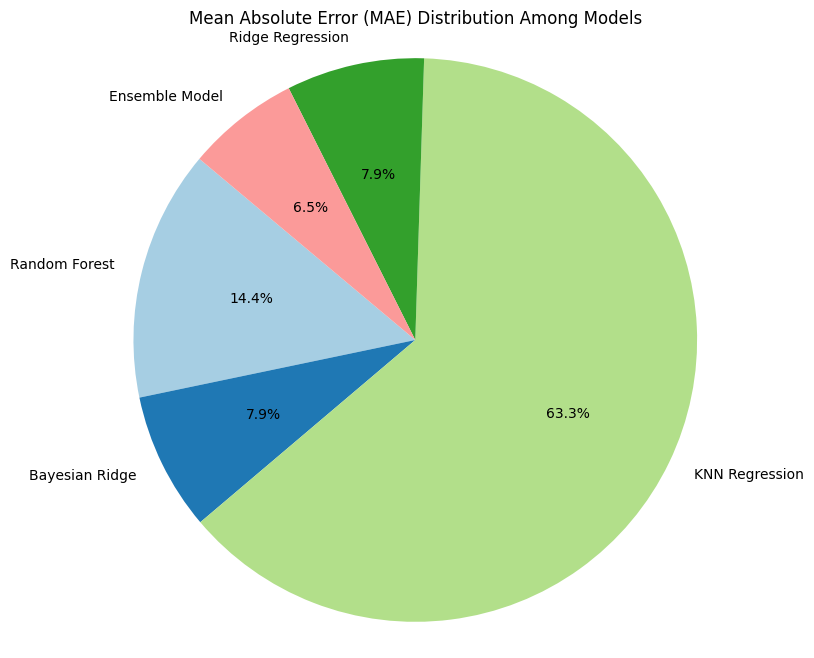

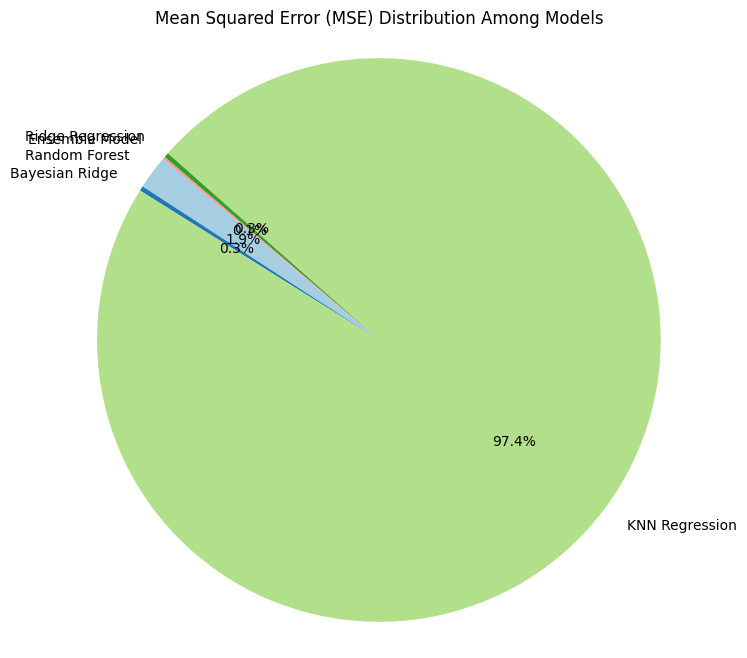

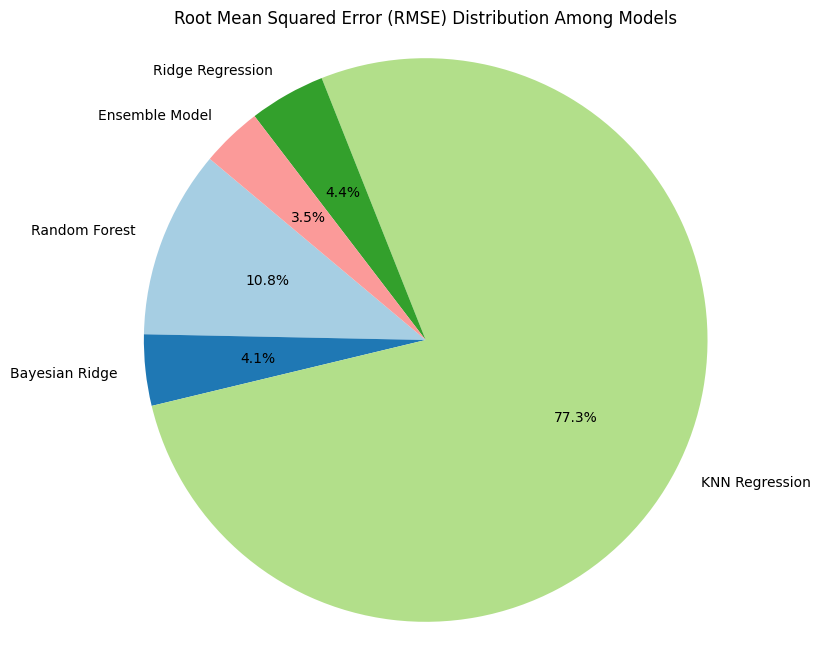

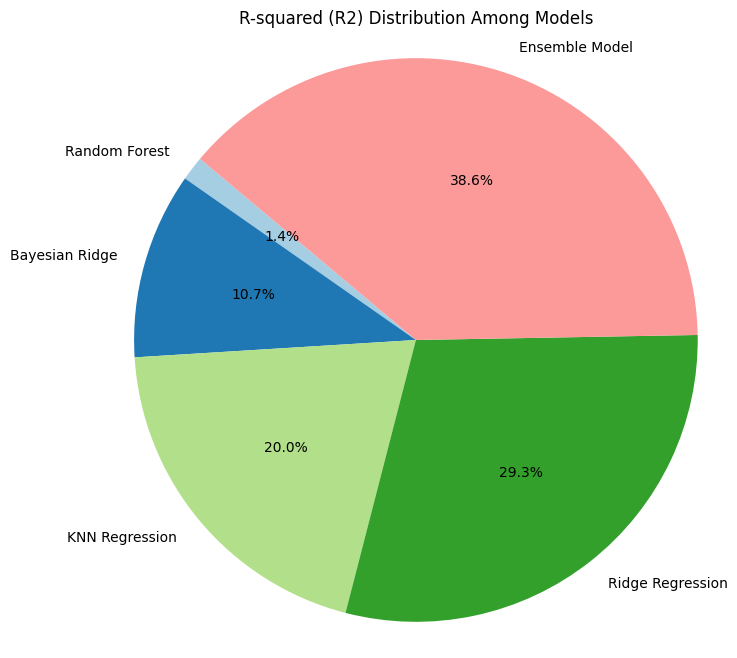

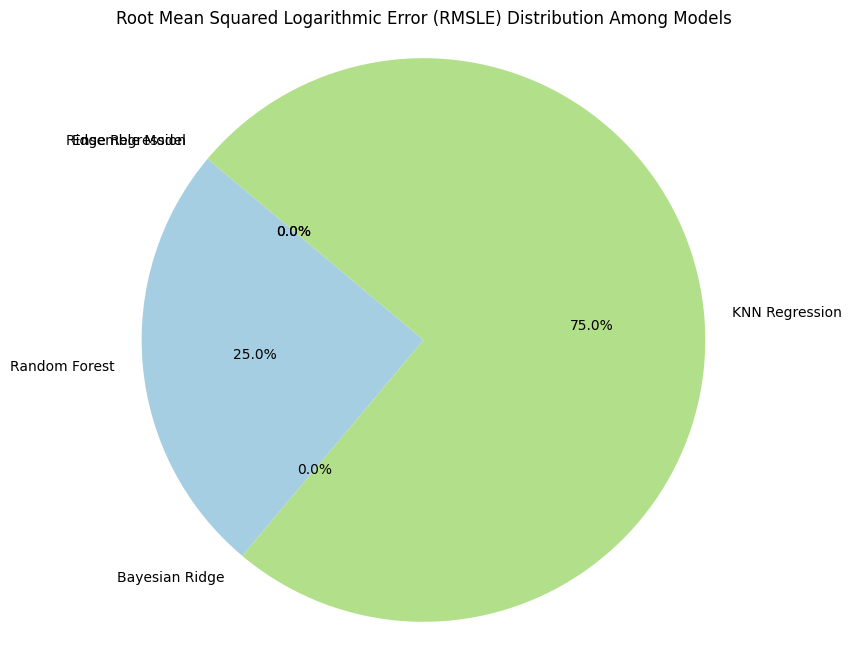

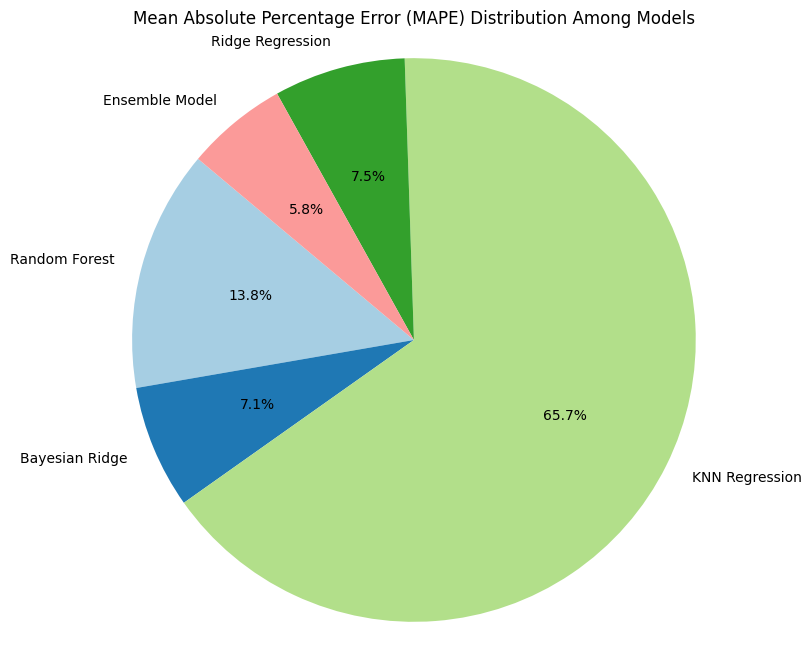

In [ ]:
# Create a pie chart for each model
def create_pie_chart(data, metric_name):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=models, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'{metric_name} Distribution Among Models')
    plt.show()

create_pie_chart(mae, 'Mean Absolute Error (MAE)')
create_pie_chart(mse, 'Mean Squared Error (MSE)')
create_pie_chart(rmse, 'Root Mean Squared Error (RMSE)')
create_pie_chart(r2, 'R-squared (R2)')
create_pie_chart(rmsle, 'Root Mean Squared Logarithmic Error (RMSLE)')
create_pie_chart(mape, 'Mean Absolute Percentage Error (MAPE)')


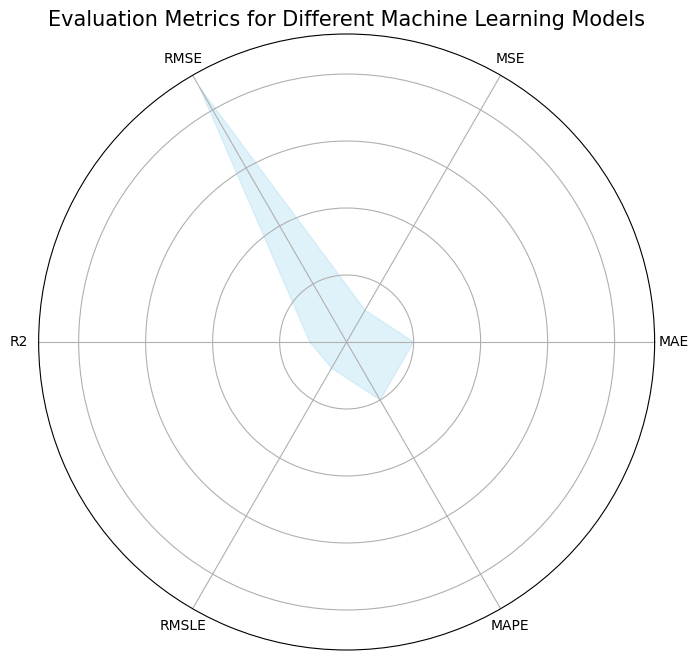

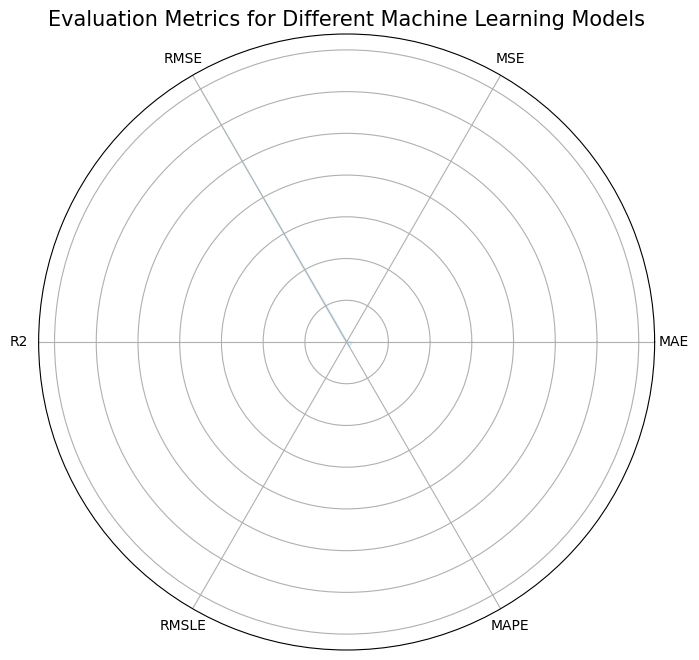

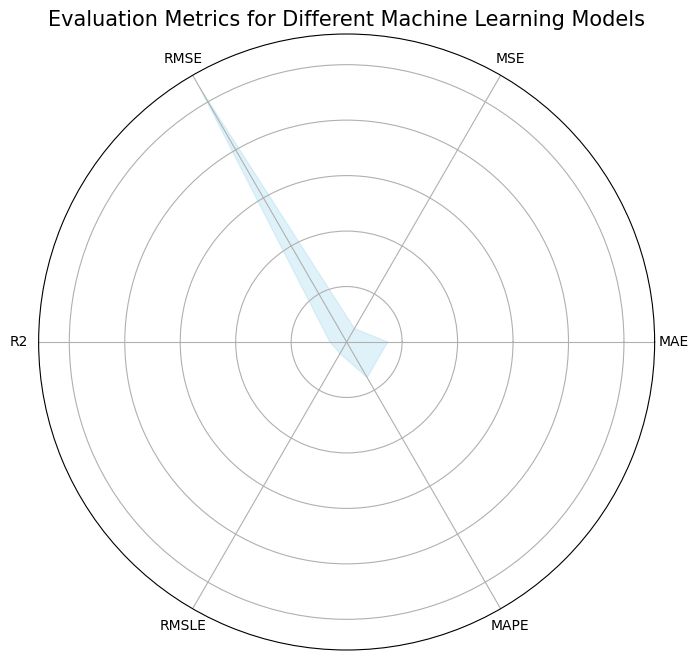

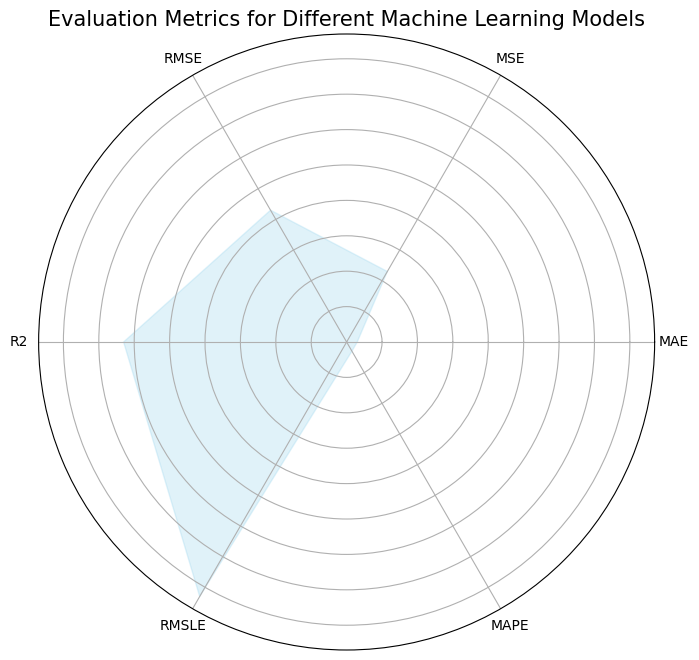

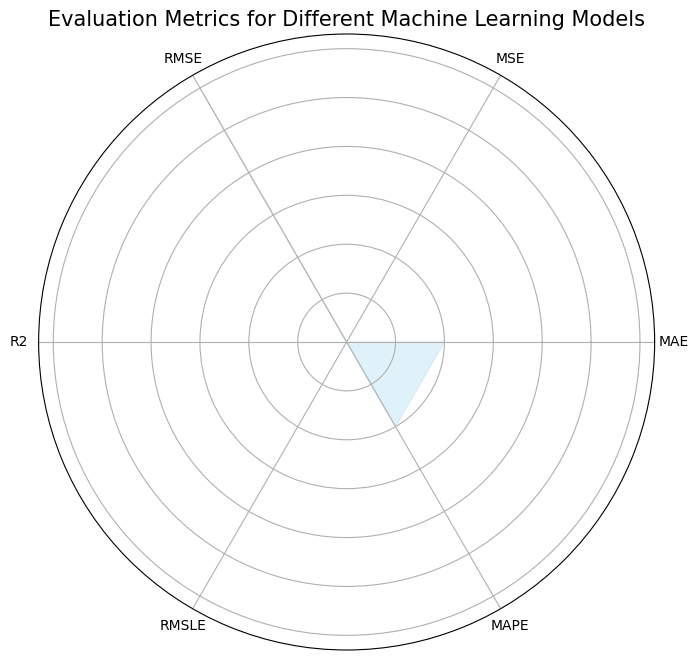

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create radar chart
def create_radar_chart(data, metric_names):
    angles = np.linspace(0, 2 * np.pi, len(metric_names), endpoint=False)
    data = np.concatenate((data, [data[0]]))  # Close the plot

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, data, color='skyblue', alpha=0.25)
    ax.set_yticklabels([])  # Hide y-axis labels for better readability
    ax.set_thetagrids(angles * 180/np.pi, metric_names)
    plt.title('Evaluation Metrics for Different Machine Learning Models', size=15)
    plt.show()

# Create radar charts for each model
metric_names = ['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']
data_list = [mae, mse, rmse, r2, rmsle, mape]

for model, data in zip(models, data_list):
    create_radar_chart(data, metric_names)


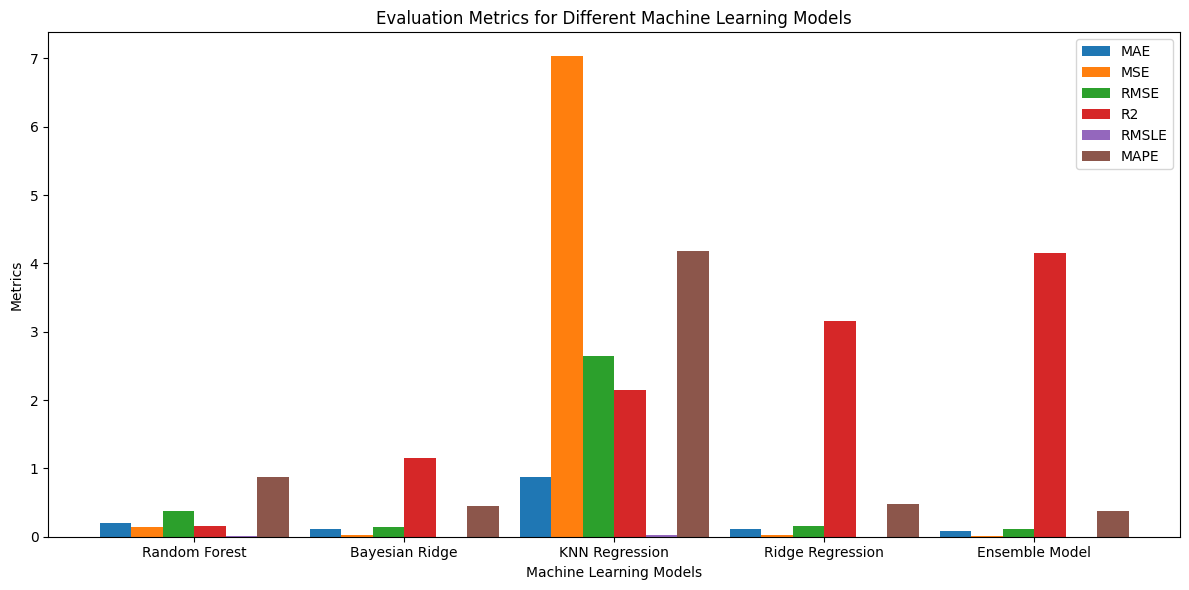

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set width of the bar
bar_width = 0.15
models_range = np.arange(len(models))

# Function to create grouped bar chart
def create_grouped_bar_chart(data_list, metric_names):
    fig, ax = plt.subplots(figsize=(12, 6))

    for i, (data, metric_name) in enumerate(zip(data_list, metric_names)):
        plt.bar(models_range + i * bar_width, data, bar_width, label=metric_name)

    plt.xlabel('Machine Learning Models')
    plt.ylabel('Metrics')
    plt.title('Evaluation Metrics for Different Machine Learning Models')
    plt.xticks(models_range + bar_width * (len(data_list) - 1) / 2, models)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create grouped bar chart for each metric
metric_names = ['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']
data_list = [mae, mse, rmse, r2, rmsle, mape]

create_grouped_bar_chart(data_list, metric_names)


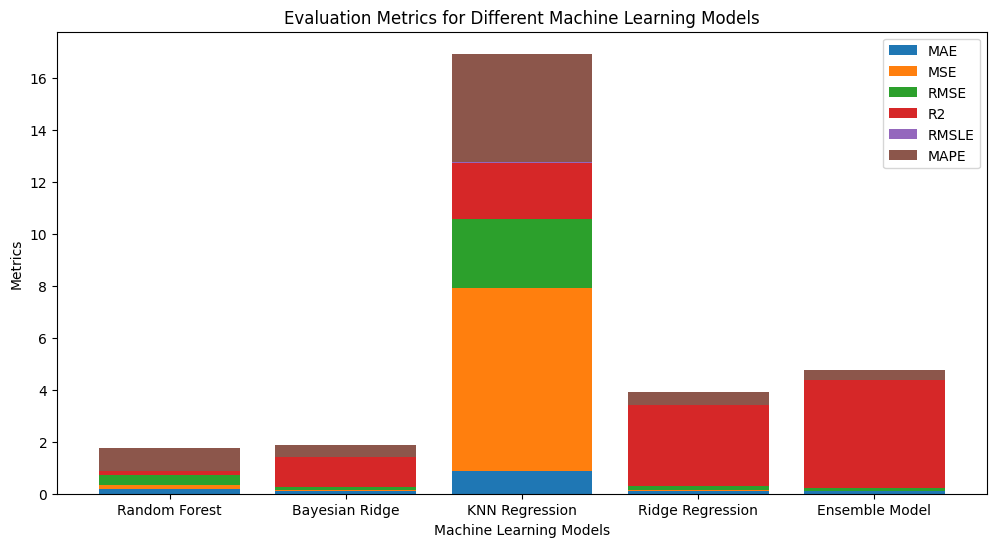

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create stacked bar chart
def create_stacked_bar_chart(data_list, metric_names):
    fig, ax = plt.subplots(figsize=(12, 6))

    bottom = np.zeros(len(models))
    for data, metric_name in zip(data_list, metric_names):
        plt.bar(models, data, label=metric_name, bottom=bottom)
        bottom += np.array(data)

    plt.xlabel('Machine Learning Models')
    plt.ylabel('Metrics')
    plt.title('Evaluation Metrics for Different Machine Learning Models')
    plt.legend()
    plt.show()

# Create stacked bar chart for each metric
metric_names = ['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']
data_list = [mae, mse, rmse, r2, rmsle, mape]

create_stacked_bar_chart(data_list, metric_names)


<ipython-input-7-7a8e8aedf31e>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis', len(metric_names))


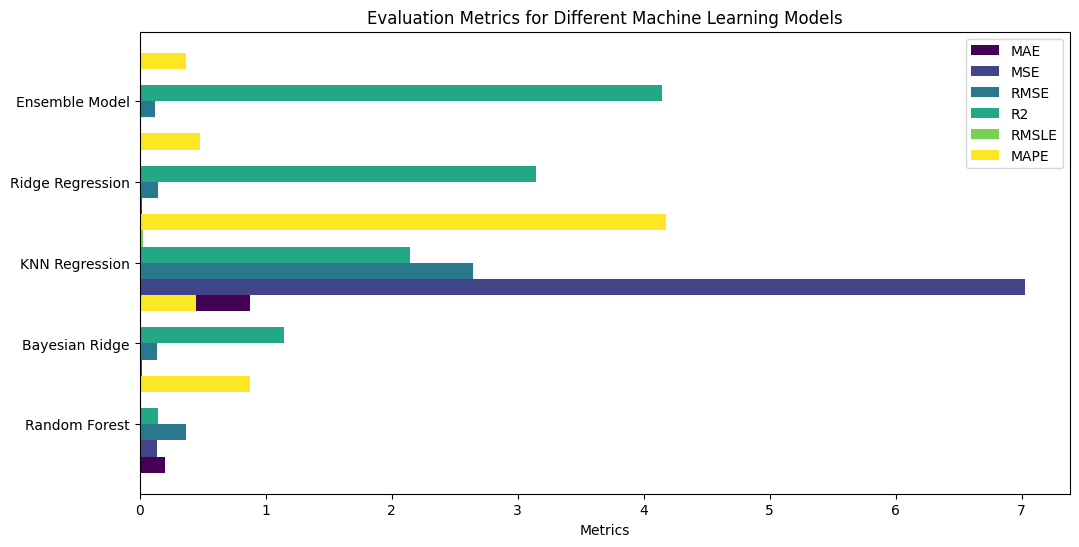

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Function to create grouped horizontal bar chart with color gradients
def create_gradient_bar_chart(data_list, metric_names):
    cmap = get_cmap('viridis', len(metric_names))
    colors = [cmap(i) for i in range(len(metric_names))]

    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.2
    bar_positions = np.arange(len(models))

    for i, (data, metric_name) in enumerate(zip(data_list, metric_names)):
        ax.barh(bar_positions + i * bar_width, data, height=bar_width, color=colors[i], label=metric_name)

    ax.set_yticks(bar_positions + bar_width * (len(metric_names) - 1) / 2)
    ax.set_yticklabels(models)
    ax.set_xlabel('Metrics')
    ax.set_title('Evaluation Metrics for Different Machine Learning Models')
    ax.legend()

    plt.show()

# Create grouped horizontal bar chart with color gradients for each metric
metric_names = ['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE']
data_list = [mae, mse, rmse, r2, rmsle, mape]

create_gradient_bar_chart(data_list, metric_names)
